## Problem Statement:
<ul>
    <li>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.</li>
    
  <li>For many incumbent operators, retaining high profitable customers is the number one business goal.</li>
  <li>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</li>
  
  <li>We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.</li>
</ul>

## Approach:
<ul>
    <li>The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months</li>
      <li>Understanding the typical customer behaviour during churn will be helpful.</li>
    
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading the Dataset

#### Step 1: Importing the Data.

In [2]:
# Reading the dataset...
telecom_churn_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Get the shape of the data...
print("Shape of the original dataset is : ")
telecom_churn_data.shape

Shape of the original dataset is : 


(99999, 226)

### Step 2: Data Cleaning and Exploratory Data Analysis.

#### Understanding Customer Behaviour During Churn

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. To do this task well, understanding the typical customer behaviour during churn will be helpful. Here in the dataset, we have to identify the three phases of customer lifecycle:

<ol>
    <li><b>Good Phase</b>: Phase where customer is happy with the service and behaves as usual.</li>
    <li><b>Action Phase:</b> Phase where the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point</li>
    <li><b>Churn Phase:</b> Phase where the customer is said to have churned.</li>
</ol>

<p>The end to end project is divided into the following tasks:</p>

<ul>
    <li><b>Data Cleaning</b>: Here we need to perform tasks like identifying missing data in both numerical and categorical data. After identifying the missing data, performing necessary actions on them for treatment.</li><br>
    <li><b>Filter HVC Customers</b>: Here we need to identify which customers are high value customers and analyze their behaviour. For this we need to use months 6 and 7 which are 'Good' phase months.</li><br>
    <li><b>Derive Churn variables</b>: In this method we need to derive 'churn' variable i.e that variable in which we see customer churning out from one telecom operator to another.</li><br>
    <li><b>Data Preparation</b>: Seggregate the 9th month data from rest of the datasets and mark that as our churn variable. Also identify the problem of data imbalance and ways to treat them.</li><br>
    <li><b>Modelling technique</b>: Create ML models of two types (Interpretable and Good Prediction) model and find out valuable factors that lead to a customer churn.</li>
</ul>


<p>Let us proceed with the journey of each of the above steps.</p>

### Data Cleaning:

In this task we will be identifying missing values for both continuous and categorical data. Below are the series of steps to be performed in this task.

1. Seggregating numerical and categorical data.
2. Identifying missing values in both numerical and categorical data.
3. Investigating columns where missing value imputation is needed and where it is not needed.
4. Applying standard imputation techniques (like mean, mode and median) as well as iterative imputation techniques (like Iterative Imputer or KNN Imputer).

Seggregating continuous and categorical data...

In [5]:
# Here we will identify continuous and categorical data and seggregating them.
categorical_data = telecom_churn_data.loc[:, telecom_churn_data.dtypes == np.object]
continuous_data = telecom_churn_data.loc[:, telecom_churn_data.dtypes != np.object]

In [6]:
# check for categorical data...
categorical_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [7]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
date_of_last_rech_6         98392 non-null object
date_of_last_rech_7         98232 non-null object
date_of_last_rech_8         96377 non-null object
date_of_last_rech_9         95239 non-null object
date_of_last_rech_data_6    25153 non-null object
date_of_last_rech_data_7    25571 non-null object
date_of_last_rech_data_8    26339 non-null object
date_of_last_rech_data_9    25922 non-null object
dtypes: object(12)
memory usage: 9.2+ MB


In [8]:
# check for continuous data...
continuous_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.

In [9]:
continuous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35)
memory usage: 163.3 MB


## Checks for Missing Values.

Now that we have two kinds of data i.e numerical and categorical, we need to determine the missing values for each type of variable. So first let us examine the percentage of missing data in continuous variables.

Examining missing data for continuous variables.

In [10]:
# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(continuous_data.isnull().sum())

total_null_percentage = []
total_null_percentage = list(continuous_data.isnull().sum()/len(continuous_data) * 100)

total_columns = list(continuous_data.columns)

null_percentage_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_df['Variables'] = total_columns
null_percentage_df['Null_Count'] = total_null_count
null_percentage_df['Null_Percentage'] = total_null_percentage

null_percentage_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
177,arpu_3g_6,74846,74.846748
205,fb_user_6,74846,74.846748
181,arpu_2g_6,74846,74.846748
185,night_pck_user_6,74846,74.846748
149,total_rech_data_6,74846,74.846748
153,max_rech_data_6,74846,74.846748
157,count_rech_2g_6,74846,74.846748
165,av_rech_amt_data_6,74846,74.846748
161,count_rech_3g_6,74846,74.846748
162,count_rech_3g_7,74428,74.428744


Examining the missing data for categorical variables.

In [11]:
# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(categorical_data.isnull().sum())

total_null_percentage = []
total_null_percentage = list(categorical_data.isnull().sum()/len(categorical_data) * 100)

total_columns = list(categorical_data.columns)

null_percentage_categorical_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_categorical_df['Variables'] = total_columns
null_percentage_categorical_df['Null_Count'] = total_null_count
null_percentage_categorical_df['Null_Percentage'] = total_null_percentage

null_percentage_categorical_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
8,date_of_last_rech_data_6,74846,74.846748
9,date_of_last_rech_data_7,74428,74.428744
11,date_of_last_rech_data_9,74077,74.077741
10,date_of_last_rech_data_8,73660,73.660737
7,date_of_last_rech_9,4760,4.760048
6,date_of_last_rech_8,3622,3.622036
5,date_of_last_rech_7,1767,1.767018
3,last_date_of_month_9,1659,1.659017
4,date_of_last_rech_6,1607,1.607016
2,last_date_of_month_8,1100,1.100011


### Inference:

After finding out the percentage of missing data across all the variables, we see that we have maximum percentage of missing data related to customer activities be it related to calling (incoming + outgoing) or be it related to data recharge. Dropping these variables can lead us to two problems:

1. We may not have variables to find out HVC (High Value Customers)
2. We may not be able to derive the churn column.

<p>However at the same time, we cannot keep these variables since it has a high percentage of missing data. So to solve this issue what we can do is this:</p>

<ul>
    <li>First focus on specific columns which are necessary for finding out HVC and do some analysis on them.</li>
    <li>Treat the missing values for those columns appropriately.</li> 
    <li>Then the rest of the columns having a high percentage of missing value can be dropped.</li>
</ul>

### Columns needed For figuring out HVC (High Value Customers).

This is necessary for months which lie in good phase i.e 6 and 7 since most of the customer activity related to their telecom service operator is going around in that phase.

We have specific columns like 'total_rech_data_x' (x = [6,7] where x represents the particular month.). x can have values as 6 and 7 since these two months are in 'Good' Phase months.

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
After identifying high value customers, we will tag churn customers based on those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase.

Let's first identify high-value customers.

1. Total_Recharge_6 = Total_Calling_6 + Total_Data_6
2. Total_Recharge_7 = Total_Calling_7 + Total_Data_7
3. Average_Recharge_6_7 = (Total_Recharge_6 + Total_Recharge_7)/2


In [12]:
telecom_churn_data['total_data_rech_6'] = telecom_churn_data['total_rech_data_6'] * telecom_churn_data['av_rech_amt_data_6']
telecom_churn_data['total_data_rech_7'] = telecom_churn_data['total_rech_data_7'] * telecom_churn_data['av_rech_amt_data_7']

telecom_churn_data['total_amount_data_6'] = telecom_churn_data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom_churn_data['total_amount_data_7'] = telecom_churn_data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

telecom_churn_data['AVG_Amount_Calling_Data_6_7'] = telecom_churn_data[['total_amount_data_6','total_amount_data_7']].mean(axis=1)


### Get the High Value Customers.

In [13]:
telecom_churn_data_hvc = telecom_churn_data[(telecom_churn_data['AVG_Amount_Calling_Data_6_7'] > telecom_churn_data['AVG_Amount_Calling_Data_6_7'].quantile(0.7))]
telecom_churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_Amount_Calling_Data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


In [14]:
telecom_churn_data_hvc.shape

(29953, 231)

### Examining the Missing Values in HVC customers...

Now that we have segreggated the High Value customers from the dataset, we have got 29.5k rows. Now lets understand the missing values of this new data set derived.

In [15]:
# See the percentage of nulls
# Here we will identify continuous and categorical data and seggregating them.
categorical_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes == np.object]
continuous_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes != np.object]

In [16]:
# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(continuous_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(continuous_data_hvc.isnull().sum()/len(continuous_data_hvc) * 100)

total_columns = list(continuous_data_hvc.columns)

null_percentage_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_df['Variables'] = total_columns
null_percentage_df['Null_Count'] = total_null_count
null_percentage_df['Null_Percentage'] = total_null_percentage

null_percentage_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
152,total_rech_data_9,14753,49.253831
188,night_pck_user_9,14753,49.253831
180,arpu_3g_9,14753,49.253831
208,fb_user_9,14753,49.253831
156,max_rech_data_9,14753,49.253831
184,arpu_2g_9,14753,49.253831
160,count_rech_2g_9,14753,49.253831
164,count_rech_3g_9,14753,49.253831
168,av_rech_amt_data_9,14753,49.253831
207,fb_user_8,14018,46.799987


In [17]:
# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(categorical_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(categorical_data_hvc.isnull().sum()/len(categorical_data_hvc) * 100)

total_columns = list(categorical_data_hvc.columns)

null_percentage_categorical_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_categorical_df['Variables'] = total_columns
null_percentage_categorical_df['Null_Count'] = total_null_count
null_percentage_categorical_df['Null_Percentage'] = total_null_percentage

null_percentage_categorical_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
11,date_of_last_rech_data_9,14753,49.253831
10,date_of_last_rech_data_8,14018,46.799987
8,date_of_last_rech_data_6,13213,44.112443
9,date_of_last_rech_data_7,12915,43.117551
7,date_of_last_rech_9,814,2.717591
6,date_of_last_rech_8,582,1.943044
3,last_date_of_month_9,365,1.218576
2,last_date_of_month_8,165,0.550863
5,date_of_last_rech_7,98,0.327179
4,date_of_last_rech_6,73,0.243715


### Inference :

Here we observe that the variables related to data recharge or data pack have high percentage of missing values. This includes variables like 'total_data_rech_6', 'total_data_rech_7', 'total_data_rech_8', 'total_data_rech_9' which are continuous variables and variables like 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9' which are categorical variables. 

Apart from that there are other variables related to average revenue like 'arpu_x', then call types within same network operator like 'onnet_mou_x' etc which also have a very high percentage of missing values. These are also continuous variables and we need to set a specific threshold beyond which we need to drop these variables.

Now coming to the imputation part, we have couple of specific methods which we can use for imputation of both categorical and continuous types of variables. These methods include:

1. Imputation with Zero
2. Imputation with Statistical Methods (like Mean, Median or Mode)
3. Iterative imputation.

We will investigate each of these imputation methods depending on the business requirement.


Investigating variables related to data recharge or data pack.

In [18]:
# investigating data recharge variables for months 6,7,8 and 9.
recharge_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 'count_rech_2g_6',
                    "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", 'count_rech_3g_6', 'count_rech_3g_7', 
                    'count_rech_3g_8', 'count_rech_3g_9','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                    'max_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom_churn_data_hvc[recharge_columns].describe(percentiles=[0.00,.05,.10,.25, .5, .75, .90, .95, .99], include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000
mean,2.987515,3.262648,3.050769,2.688882,2.222162,2.458974,2.273110,1.872895,0.765352,0.803674,0.777659,0.815987,139.804002,140.444712,136.353373,140.854605,234.003257,245.977234,229.716717,227.826179
std,3.228484,3.497957,3.540332,2.851568,3.006502,3.236767,3.113894,2.463316,1.478287,1.618485,1.668363,1.638296,118.892926,120.295284,119.571138,119.700638,218.468385,221.778856,217.379834,215.040823
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,23.000000,23.000000,23.000000,25.000000,33.000000,25.000000,23.000000
10%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,23.000000,23.000000,23.000000,49.000000,52.500000,36.000000,25.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.000000,123.000000,138.000000,100.000000,98.000000
50%,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,152.000000,152.000000,152.000000,185.000000,198.000000,179.000000,179.000000
75%,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,198.000000,198.000000,198.000000,198.000000,296.000000,304.000000,274.000000,274.000000


### Observation:

<ul>
    <li>It is observed that recharge columns like 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9' have a minimum value of 1.0.</li>
    <li>Also columns like 'max_rech_data' and 'avg_rech_amt_data' for months 6,7,8 and 9 have a minimum value of 1.0.</li>
    <li>Rest of the columns have a minimum value of 0.0. These values are related to count of recharges for 2G and 3G packs.</li>
</ul>

Now whenever a customer recharges or renews his data pack, his last date of recharge is also recorded. However here in the dataset we observe that column pairs ('total_rech_data_6' and 'date_of_last_rech_data_6'), ('total_rech_data_7' and 'date_of_last_rech_data_7'), ('total_rech_data_8' and 'date_of_last_rech_data_8') and ('total_rech_data_9' and 'date_of_last_rech_data_9') have same percentage of missing data in the dataset. 

Here 'total_rech_data_x' represents the total recharges done by customers in the particular month 'x'. Also 'date_of_last_rech_data_x' represents the date of last recharge done in the particular month 'x'. 

Let us examine these pair of columns simulaneously:

For Month 6.

In [19]:
telecom_churn_data_hvc.loc[(telecom_churn_data_hvc['total_rech_data_6'].isnull()) & (telecom_churn_data_hvc['date_of_last_rech_data_6'].isnull())
                          , ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
7,NaN,NaN
8,NaN,NaN
21,NaN,NaN
23,NaN,NaN
38,NaN,NaN
41,NaN,NaN
48,NaN,NaN
69,NaN,NaN
73,NaN,NaN
77,NaN,NaN


For Month 7.

In [20]:
telecom_churn_data_hvc.loc[(telecom_churn_data_hvc['total_rech_data_7'].isnull()) & (telecom_churn_data_hvc['date_of_last_rech_data_7'].isnull())
                          , ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)

,total_rech_data_7,date_of_last_rech_data_7
7,NaN,NaN
21,NaN,NaN
38,NaN,NaN
41,NaN,NaN
48,NaN,NaN
69,NaN,NaN
86,NaN,NaN
96,NaN,NaN
103,NaN,NaN
111,NaN,NaN


For Month 8.

In [21]:
telecom_churn_data_hvc.loc[(telecom_churn_data_hvc['total_rech_data_8'].isnull()) & (telecom_churn_data_hvc['date_of_last_rech_data_8'].isnull())
                          , ["total_rech_data_8", "date_of_last_rech_data_8"]].head(20)

,total_rech_data_8,date_of_last_rech_data_8
7,NaN,NaN
21,NaN,NaN
38,NaN,NaN
41,NaN,NaN
48,NaN,NaN
67,NaN,NaN
69,NaN,NaN
73,NaN,NaN
77,NaN,NaN
86,NaN,NaN


For Month 9.

In [22]:
telecom_churn_data_hvc.loc[(telecom_churn_data_hvc['total_rech_data_9'].isnull()) & (telecom_churn_data_hvc['date_of_last_rech_data_9'].isnull())
                          , ["total_rech_data_9", "date_of_last_rech_data_9"]].head(20)

,total_rech_data_9,date_of_last_rech_data_9
0,NaN,NaN
7,NaN,NaN
8,NaN,NaN
21,NaN,NaN
41,NaN,NaN
48,NaN,NaN
67,NaN,NaN
69,NaN,NaN
73,NaN,NaN
77,NaN,NaN


### Observation:

Here we observe that for months 6,7,8 and 9 wherever the variable 'total_rech_data' has NaN value, the corresponding column 'date_of_last_rech' is also NaN. 

In business perspective, we can infer that whenever customers have not recharged or renewed their data packs on a particular month, the column date_of_last_rech is recorded as NaN. So one way of imputing the recharge columns is by imputing it with zero.

### Treatment of these Missing Values:

Here we will try imputing these missing values with zero.

In [23]:
columns_for_imputation_with_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

# imputation with zero...
telecom_churn_data_hvc[columns_for_imputation_with_zero] = telecom_churn_data_hvc[columns_for_imputation_with_zero].apply(lambda x:x.fillna(0))

In [24]:
# print the percentage of Nulls in the continuous dataset...
print("Checking the percentage of nulls in the dataset...")

continuous_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes != np.object]

# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(continuous_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(continuous_data_hvc.isnull().sum()/len(continuous_data_hvc) * 100)

total_columns = list(continuous_data_hvc.columns)

null_percentage_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_df['Variables'] = total_columns
null_percentage_df['Null_Count'] = total_null_count
null_percentage_df['Null_Percentage'] = total_null_percentage

null_percentage_df.sort_values(by=['Null_Percentage'], ascending=True)

Checking the percentage of nulls in the dataset...


,Variables,Null_Count,Null_Percentage
0,mobile_number,0,0.000000
155,max_rech_data_8,0,0.000000
154,max_rech_data_7,0,0.000000
153,max_rech_data_6,0,0.000000
152,total_rech_data_9,0,0.000000
151,total_rech_data_8,0,0.000000
150,total_rech_data_7,0,0.000000
149,total_rech_data_6,0,0.000000
148,last_day_rch_amt_9,0,0.000000
147,last_day_rch_amt_8,0,0.000000


In [25]:
# Also lets describe those columns again...
print("Summary Statistics of these columns : ")
recharge_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 'count_rech_2g_6',
                    "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9", 'count_rech_3g_6', 'count_rech_3g_7', 
                    'count_rech_3g_8', 'count_rech_3g_9','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                    'max_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom_churn_data_hvc[recharge_columns].describe(percentiles=[0.00,.05,.10,.25, .5, .75, .90, .95, .99], include='all')

Summary Statistics of these columns : 


,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,29953.000000,29953.000000,29953.000000,29953.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,1.669649,1.855874,1.623009,1.364504,2.222162,2.458974,2.273110,1.872895,0.765352,0.803674,0.777659,0.815987,78.133042,79.888392,72.540013,71.478316,130.778704,139.917875,122.209324,115.613058
std,2.832934,3.093650,2.997534,2.435865,3.006502,3.236767,3.113894,2.463316,1.478287,1.618485,1.668363,1.638296,112.776299,114.320313,110.612367,110.588718,200.433474,206.923923,195.645691,190.890807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,23.000000,17.000000,50.000000,69.000000,25.000000,17.000000
75%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,154.000000,154.000000,154.000000,152.000000,198.000000,210.000000,196.000000,179.000000


### Observation:

Now after performing imputation with zero, we observe that the minimum values in the recharge columns have become 0.0 and here NaN values for the above columns are treated appropriately.

### Investigating the Average Revenue and related variables.

Having investigated the total_recharge_columns for data pack related services above, we saw that there was a high percentage of missing data in those columns and that percentage was attributed to the column date_of_last_recharge, thereby giving an observation that when the customers has not renewed his data pack in the last month, these columns show NaN values.

This in-turn has also affected the variables like total_data_packs_recharged, average_revenue etc. Hence these columns being the conglomeration of the above variables also show high percentage of missing data (Mostly above 40%). Hence we can drop these variables. But for dropping these variables, we need to set up a threshold value.

Let us examine the summary statistics of the variables with high degree of missing data.

In [26]:
revenue_related_columns = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 
                           'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 
                           'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 
                           'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 
                           'fb_user_8', 'fb_user_9', 'total_data_rech_6', 'total_data_rech_7']

telecom_churn_data_hvc[revenue_related_columns].describe(percentiles=[0.00,.05,.10,.25, .5, .75, .90, .95, .99], include='all')

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,total_data_rech_6,total_data_rech_7
count,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000,15935.000000,15200.000000,16740.000000,17038.000000
mean,2.222162,2.458974,2.273110,1.872895,0.765352,0.803674,0.777659,0.815987,120.055618,120.810794,118.106064,133.659095,113.672310,113.907625,109.877727,121.474260,0.024313,0.022010,0.021399,0.017632,0.926583,0.921763,0.897207,0.891316,816.617489,929.914848
std,3.006502,3.236767,3.113894,2.463316,1.478287,1.618485,1.668363,1.638296,226.164119,229.671975,218.976760,260.692258,201.863076,206.150982,195.417759,201.815961,0.154024,0.146719,0.144716,0.131612,0.260827,0.268552,0.303697,0.311253,1820.003473,1860.881839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,-71.090000,-15.320000,-15.480000,-24.430000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.280000,-26.040000,-24.490000,-71.090000,-15.320000,-15.480000,-24.430000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,33.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,92.000000,98.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,154.000000,154.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.605000,13.000000,10.020000,21.910000,27.085000,24.065000,20.000000,33.395000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,324.000000,400.000000
75%,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,178.345000,180.522500,179.630000,212.170000,168.745000,167.670000,157.525000,212.170000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,856.000000,992.000000


### Observation:

Here for the months 6,7 and 8, we see that values of count related variables for 2G and 3G data packs are 0.0 for 5,10 and 25th percentiles. Also the average revenue in these months is coming in negative for these months. So there are two issues here:

1. These variables are not showing any significant values at respective percentiles, which could mean that there is hardly any
   data distribution here.
  
2. These variables contain a high percentage of missing values. So its better to drop them.

### Treatment of Missing Values:
<b>Note:</b> Here we will drop variables only related to 6,7 and 8 months. We will exclude variables related to 9th month since 9th month is useful ahead for determinig the Churn phase. For variables related to 9th month we will impute them with zero.

Let's keep the threshold value as 40% since most of these variables are above 40%.

In [27]:
threshold_limit = 0.4

# get all the continuous variables...
total_continuous_variable_columns = list(continuous_data_hvc.columns)

columns_for_drop = []

for column in total_continuous_variable_columns:
    # check if the value is greater than the threshold limit...
    if telecom_churn_data_hvc[column].isnull().sum()/len(telecom_churn_data_hvc) > threshold_limit:
        columns_for_drop.append(column)
    else:
        pass

print("Columns for dropping are : ")
print(columns_for_drop)

print()

print("Total Columns for Dropping are : ", len(columns_for_drop))


Columns for dropping are : 
['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'total_data_rech_6', 'total_data_rech_7']

Total Columns for Dropping are :  26


Of all the 26 columns, we will eliminate the columns ending with '_9' as these are Churn Phase columns. Dropping the above computed columns...

In [28]:
# Columns to be dropped...
columns_for_drop = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                    'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                    'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 
                    'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                    'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_data_rech_6', 
                    'total_data_rech_7']

# Churn Phase columns for imputation...
churn_columns_for_imputation = ['count_rech_2g_9', 'count_rech_3g_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']

# dropping the columns
telecom_churn_data_hvc.drop(columns_for_drop, axis=1, inplace=True)

In [29]:
# Imputation of the remaining columns....
telecom_churn_data_hvc[churn_columns_for_imputation] = telecom_churn_data_hvc[churn_columns_for_imputation].apply(lambda x:x.fillna(0))

In [30]:
# print the percentage of Nulls in the continuous dataset...
print("Checking the percentage of nulls in the dataset...")

continuous_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes != np.object]

# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(continuous_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(continuous_data_hvc.isnull().sum()/len(continuous_data_hvc) * 100)

total_columns = list(continuous_data_hvc.columns)

null_percentage_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_df['Variables'] = total_columns
null_percentage_df['Null_Count'] = total_null_count
null_percentage_df['Null_Percentage'] = total_null_percentage

null_percentage_df.sort_values(by=['Null_Percentage'], ascending=True)

Checking the percentage of nulls in the dataset...


,Variables,Null_Count,Null_Percentage
0,mobile_number,0,0.000000
145,last_day_rch_amt_6,0,0.000000
146,last_day_rch_amt_7,0,0.000000
147,last_day_rch_amt_8,0,0.000000
148,last_day_rch_amt_9,0,0.000000
149,total_rech_data_6,0,0.000000
150,total_rech_data_7,0,0.000000
144,max_rech_amt_9,0,0.000000
151,total_rech_data_8,0,0.000000
153,max_rech_data_6,0,0.000000


Now we have eliminated a major chunk of continuous variables which were having a high degree of missing data. Also those continuous variables which share similar percentage of null values with some of categorical variables are imputed with zero as per their business domain significance.

Although we still do have variables which have a certain degree of missing data but the percentage of missing data in these variables is not that high.(Approx 6%). We will try some iterative imputation techniques for these variables.

### Missing Value Check for Categorical variables.

Having completed the missing value checks and treatments for most of the continuous variables, its time to look at some of the categorical variables and investigate them.

In [31]:
list_categorical_variables = list()
categorical_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes == np.object]

list_categorical_variables = list(categorical_data_hvc.columns)

print("Total Categorical Variables are : ", len(list_categorical_variables))

print()

print("Categorical variables list is : ")
print(list_categorical_variables)

Total Categorical Variables are :  12

Categorical variables list is : 
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [32]:
#Examining the categorical variable 'last_date_of_month_x'...
print("Examining the categorical variable 'last_date_of_month_x'")
print(telecom_churn_data_hvc.last_date_of_month_6.value_counts())
print(telecom_churn_data_hvc.last_date_of_month_7.value_counts())
print(telecom_churn_data_hvc.last_date_of_month_8.value_counts())
print(telecom_churn_data_hvc.last_date_of_month_9.value_counts())

print()

# Examining the categorical variable 'date_of_last_rech_x'
print("Examining the categorical variable 'date_of_last_rech_x'")
print(telecom_churn_data_hvc.date_of_last_rech_6.value_counts())
print(telecom_churn_data_hvc.date_of_last_rech_7.value_counts())
print(telecom_churn_data_hvc.date_of_last_rech_8.value_counts())
print(telecom_churn_data_hvc.date_of_last_rech_9.value_counts())

print()


Examining the categorical variable 'last_date_of_month_x'
6/30/2014    29953
Name: last_date_of_month_6, dtype: int64
7/31/2014    29926
Name: last_date_of_month_7, dtype: int64
8/31/2014    29788
Name: last_date_of_month_8, dtype: int64
9/30/2014    29588
Name: last_date_of_month_9, dtype: int64

Examining the categorical variable 'date_of_last_rech_x'
6/30/2014    8365
6/29/2014    5327
6/28/2014    3661
6/27/2014    3155
6/26/2014    1823
6/25/2014    1323
6/24/2014    1041
6/23/2014     697
6/21/2014     638
6/14/2014     549
6/22/2014     525
6/17/2014     454
6/20/2014     397
6/19/2014     387
6/18/2014     387
6/12/2014     211
6/13/2014     210
6/16/2014     203
6/15/2014     141
6/11/2014      81
6/8/2014       60
6/7/2014       47
6/10/2014      47
6/5/2014       33
6/9/2014       27
6/3/2014       25
6/6/2014       24
6/4/2014       19
6/2/2014       13
6/1/2014       10
Name: date_of_last_rech_6, dtype: int64
7/31/2014    7605
7/30/2014    5276
7/29/2014    3472
7/28/2014 

In [33]:
# Examining the categorical data...
categorical_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes == np.object]
categorical_data_hvc.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
21,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/18/2014,7/7/2014,8/24/2014,9/28/2014,NaN,7/7/2014,8/6/2014,9/9/2014


In [34]:
# Checking the count and percentage of null values in all columns of the categorical dataframe.
total_null_count = []
total_null_count = list(categorical_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(categorical_data_hvc.isnull().sum()/len(categorical_data_hvc) * 100)

total_columns = list(categorical_data_hvc.columns)

null_percentage_categorical_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_categorical_df['Variables'] = total_columns
null_percentage_categorical_df['Null_Count'] = total_null_count
null_percentage_categorical_df['Null_Percentage'] = total_null_percentage

null_percentage_categorical_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
11,date_of_last_rech_data_9,14753,49.253831
10,date_of_last_rech_data_8,14018,46.799987
8,date_of_last_rech_data_6,13213,44.112443
9,date_of_last_rech_data_7,12915,43.117551
7,date_of_last_rech_9,814,2.717591
6,date_of_last_rech_8,582,1.943044
3,last_date_of_month_9,365,1.218576
2,last_date_of_month_8,165,0.550863
5,date_of_last_rech_7,98,0.327179
4,date_of_last_rech_6,73,0.243715


### Examining the date of last recharge data columns...

For Month 6...

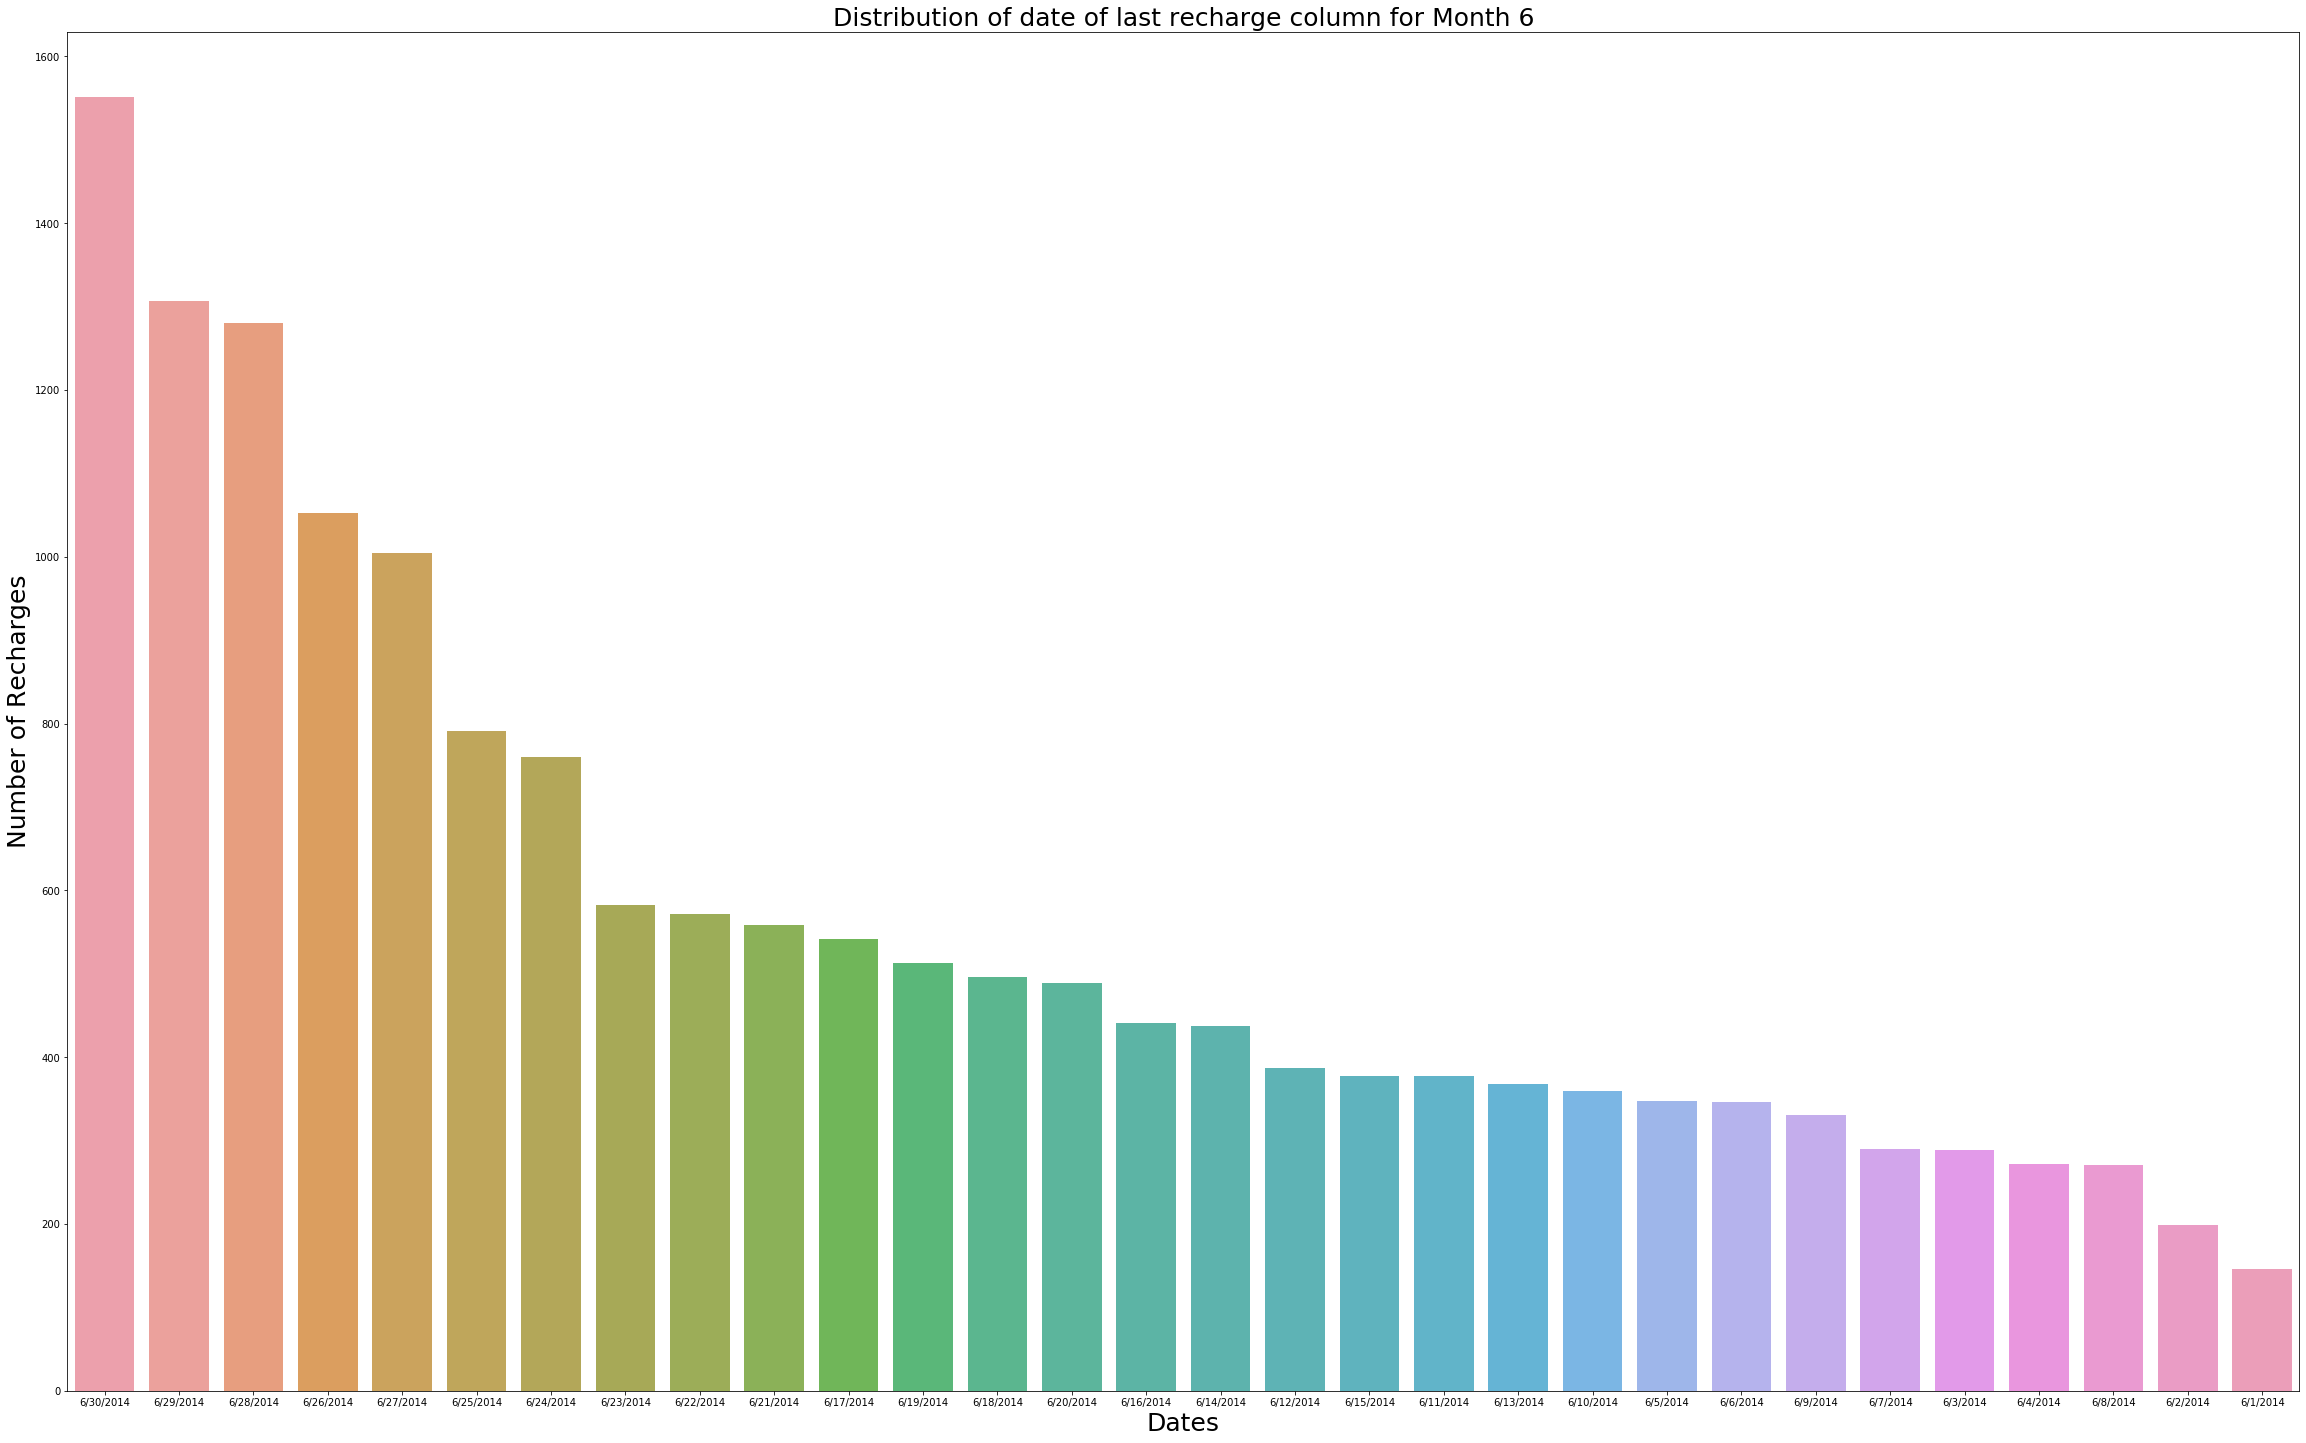

In [35]:
last_rech_data_6_count = telecom_churn_data_hvc.date_of_last_rech_data_6.value_counts()
plt.figure(figsize=(40,25))
sns.barplot(last_rech_data_6_count.index, last_rech_data_6_count.values, alpha=0.9)
plt.title('Distribution of date of last recharge column for Month 6', fontsize=25)
plt.ylabel('Number of Recharges', fontsize=25)
plt.xlabel('Dates', fontsize=25)
plt.show()

For Month 7...

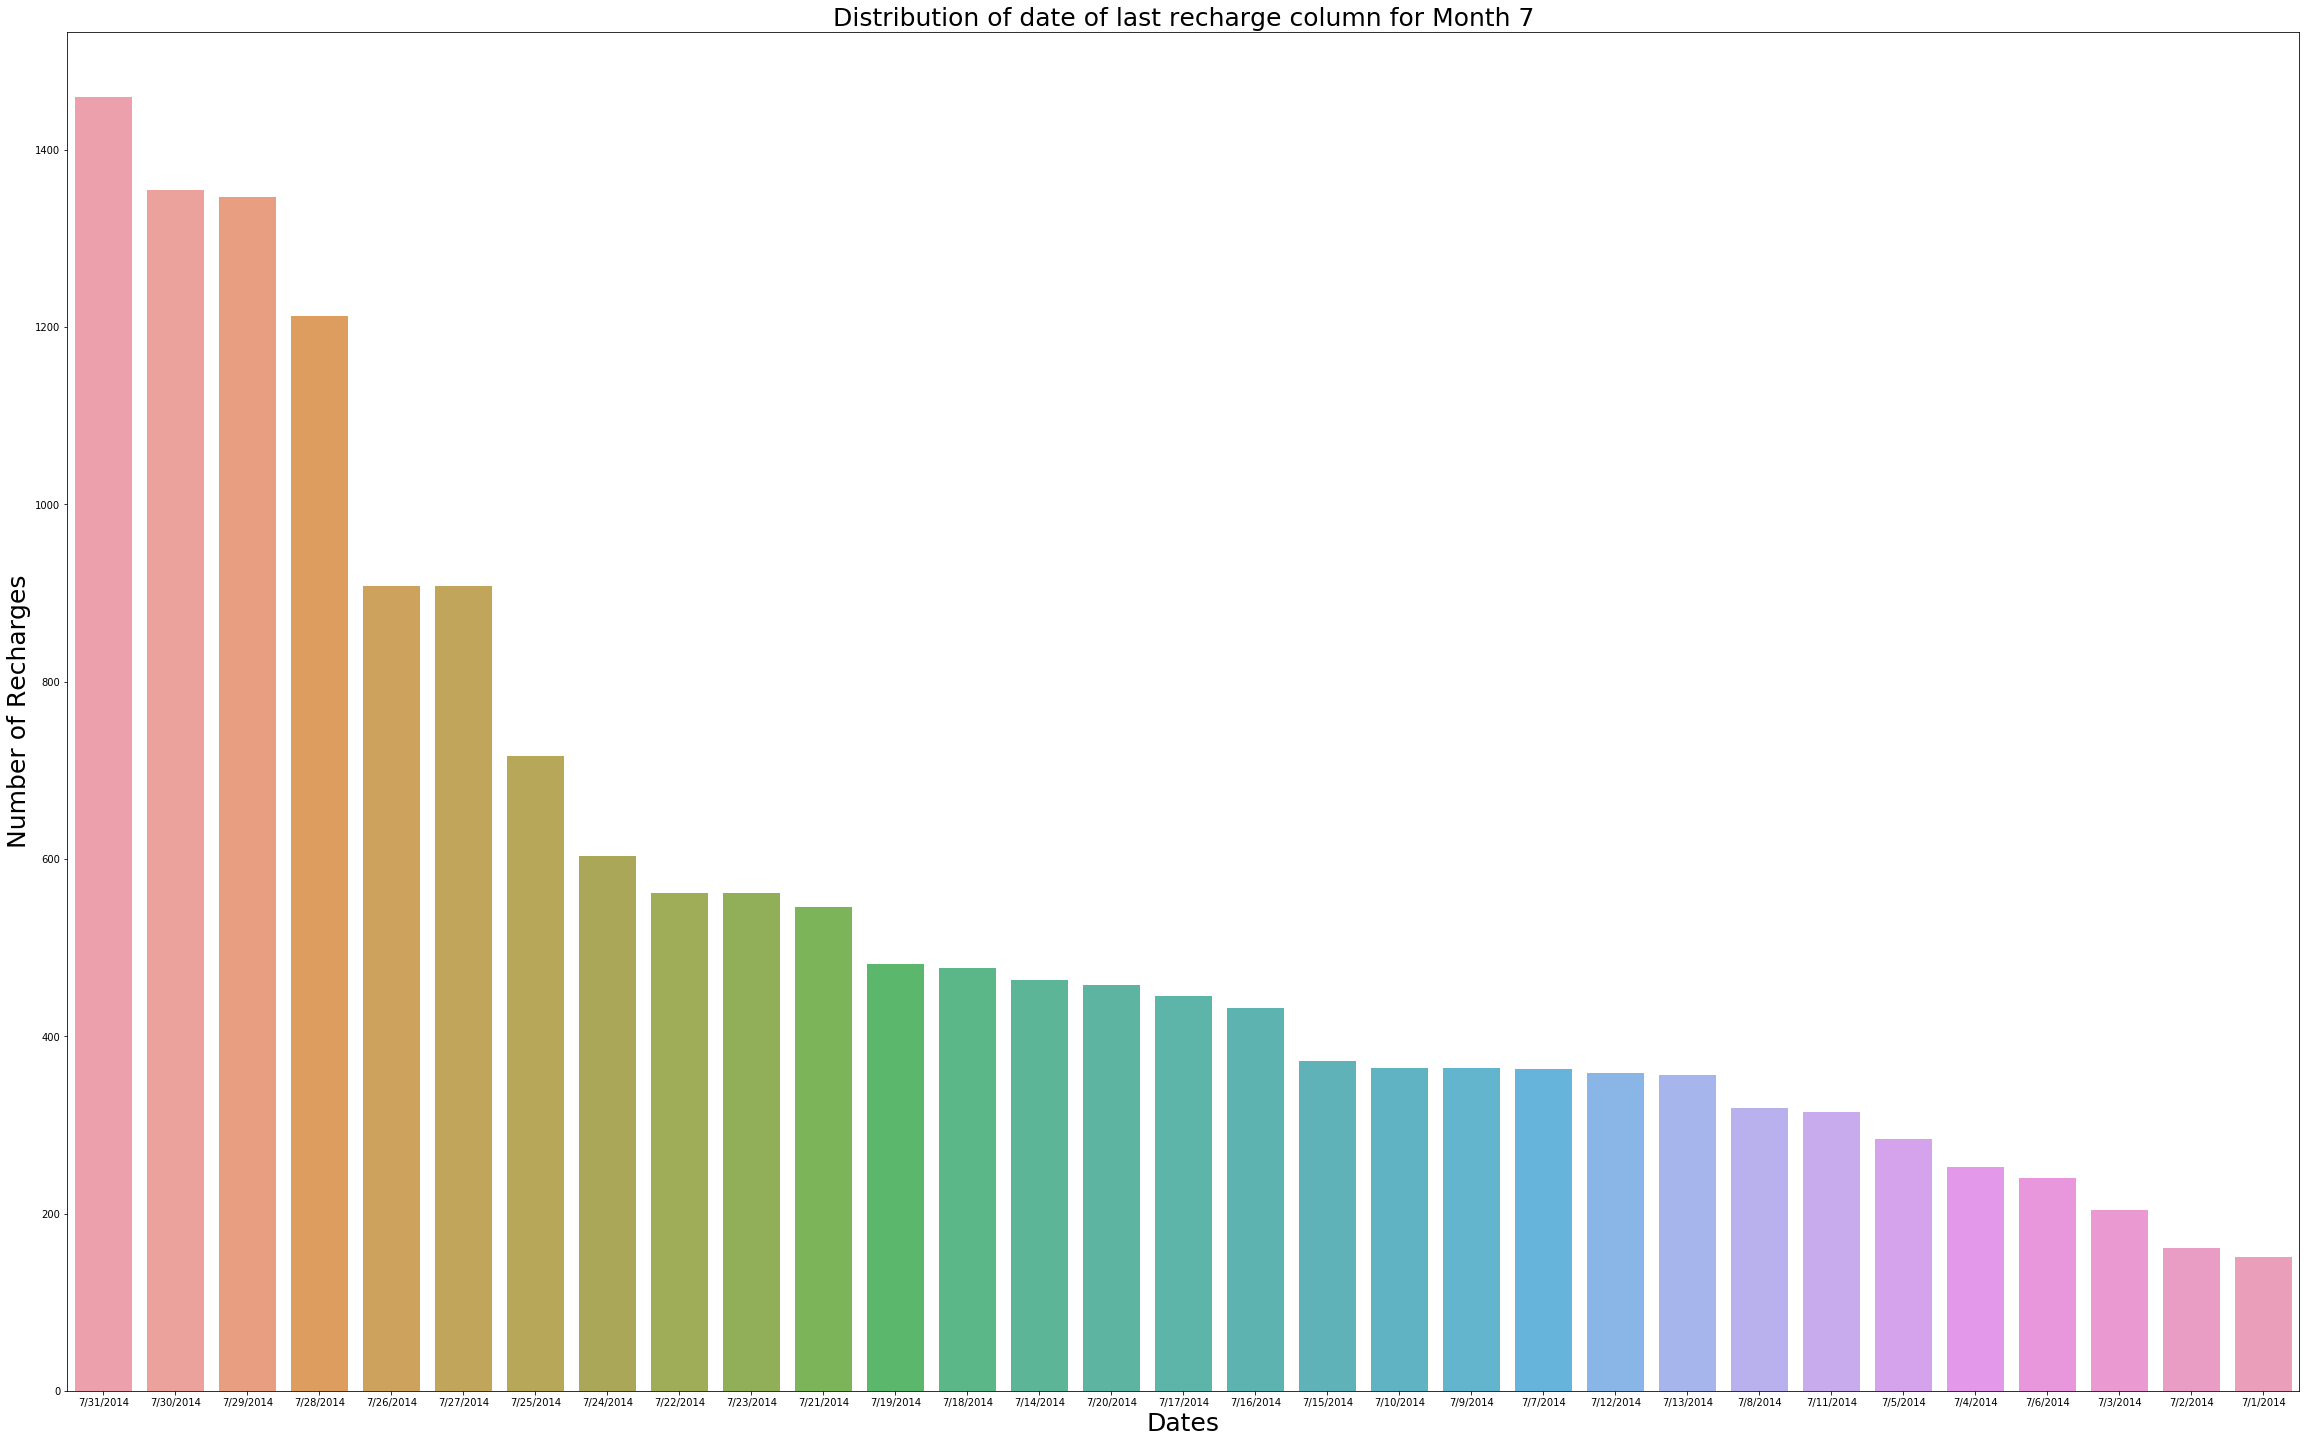

In [36]:
last_rech_data_7_count = telecom_churn_data_hvc.date_of_last_rech_data_7.value_counts()
plt.figure(figsize=(40,25))
sns.barplot(last_rech_data_7_count.index, last_rech_data_7_count.values, alpha=0.9)
plt.title('Distribution of date of last recharge column for Month 7', fontsize=25)
plt.ylabel('Number of Recharges', fontsize=25)
plt.xlabel('Dates', fontsize=25)
plt.show()

For Month 8...

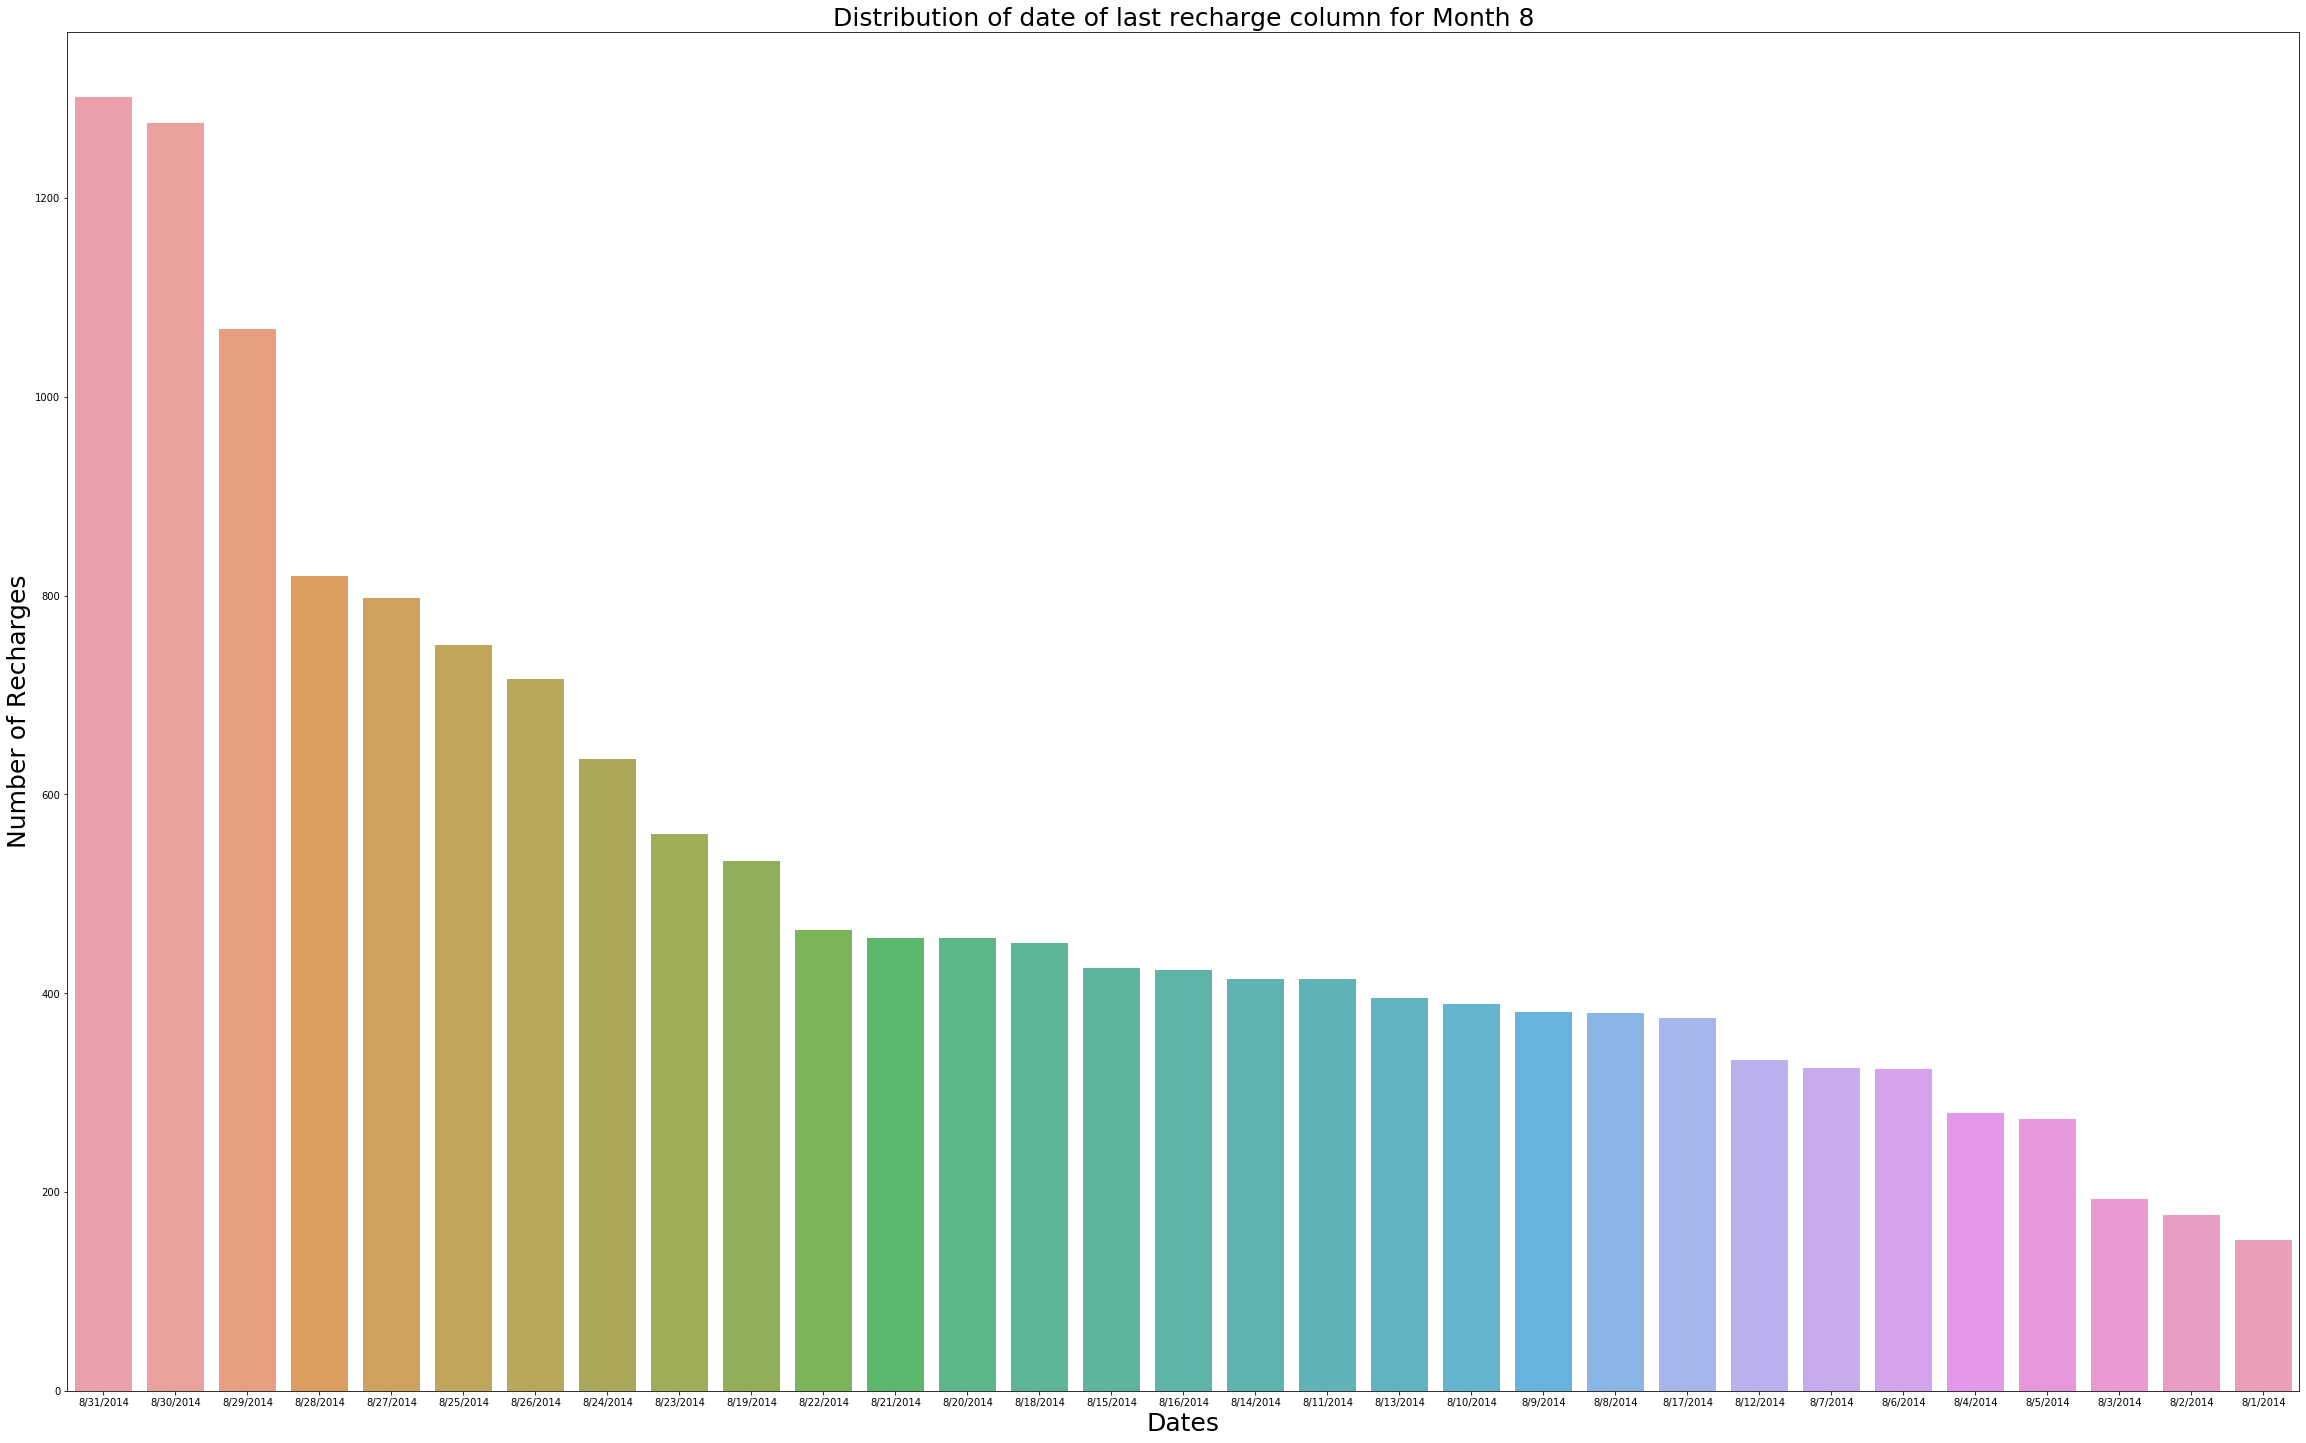

In [37]:
last_rech_data_8_count = telecom_churn_data_hvc.date_of_last_rech_data_8.value_counts()
plt.figure(figsize=(40,25))
sns.barplot(last_rech_data_8_count.index, last_rech_data_8_count.values, alpha=0.9)
plt.title('Distribution of date of last recharge column for Month 8', fontsize=25)
plt.ylabel('Number of Recharges', fontsize=25)
plt.xlabel('Dates', fontsize=25)
plt.show()

For Month 9...

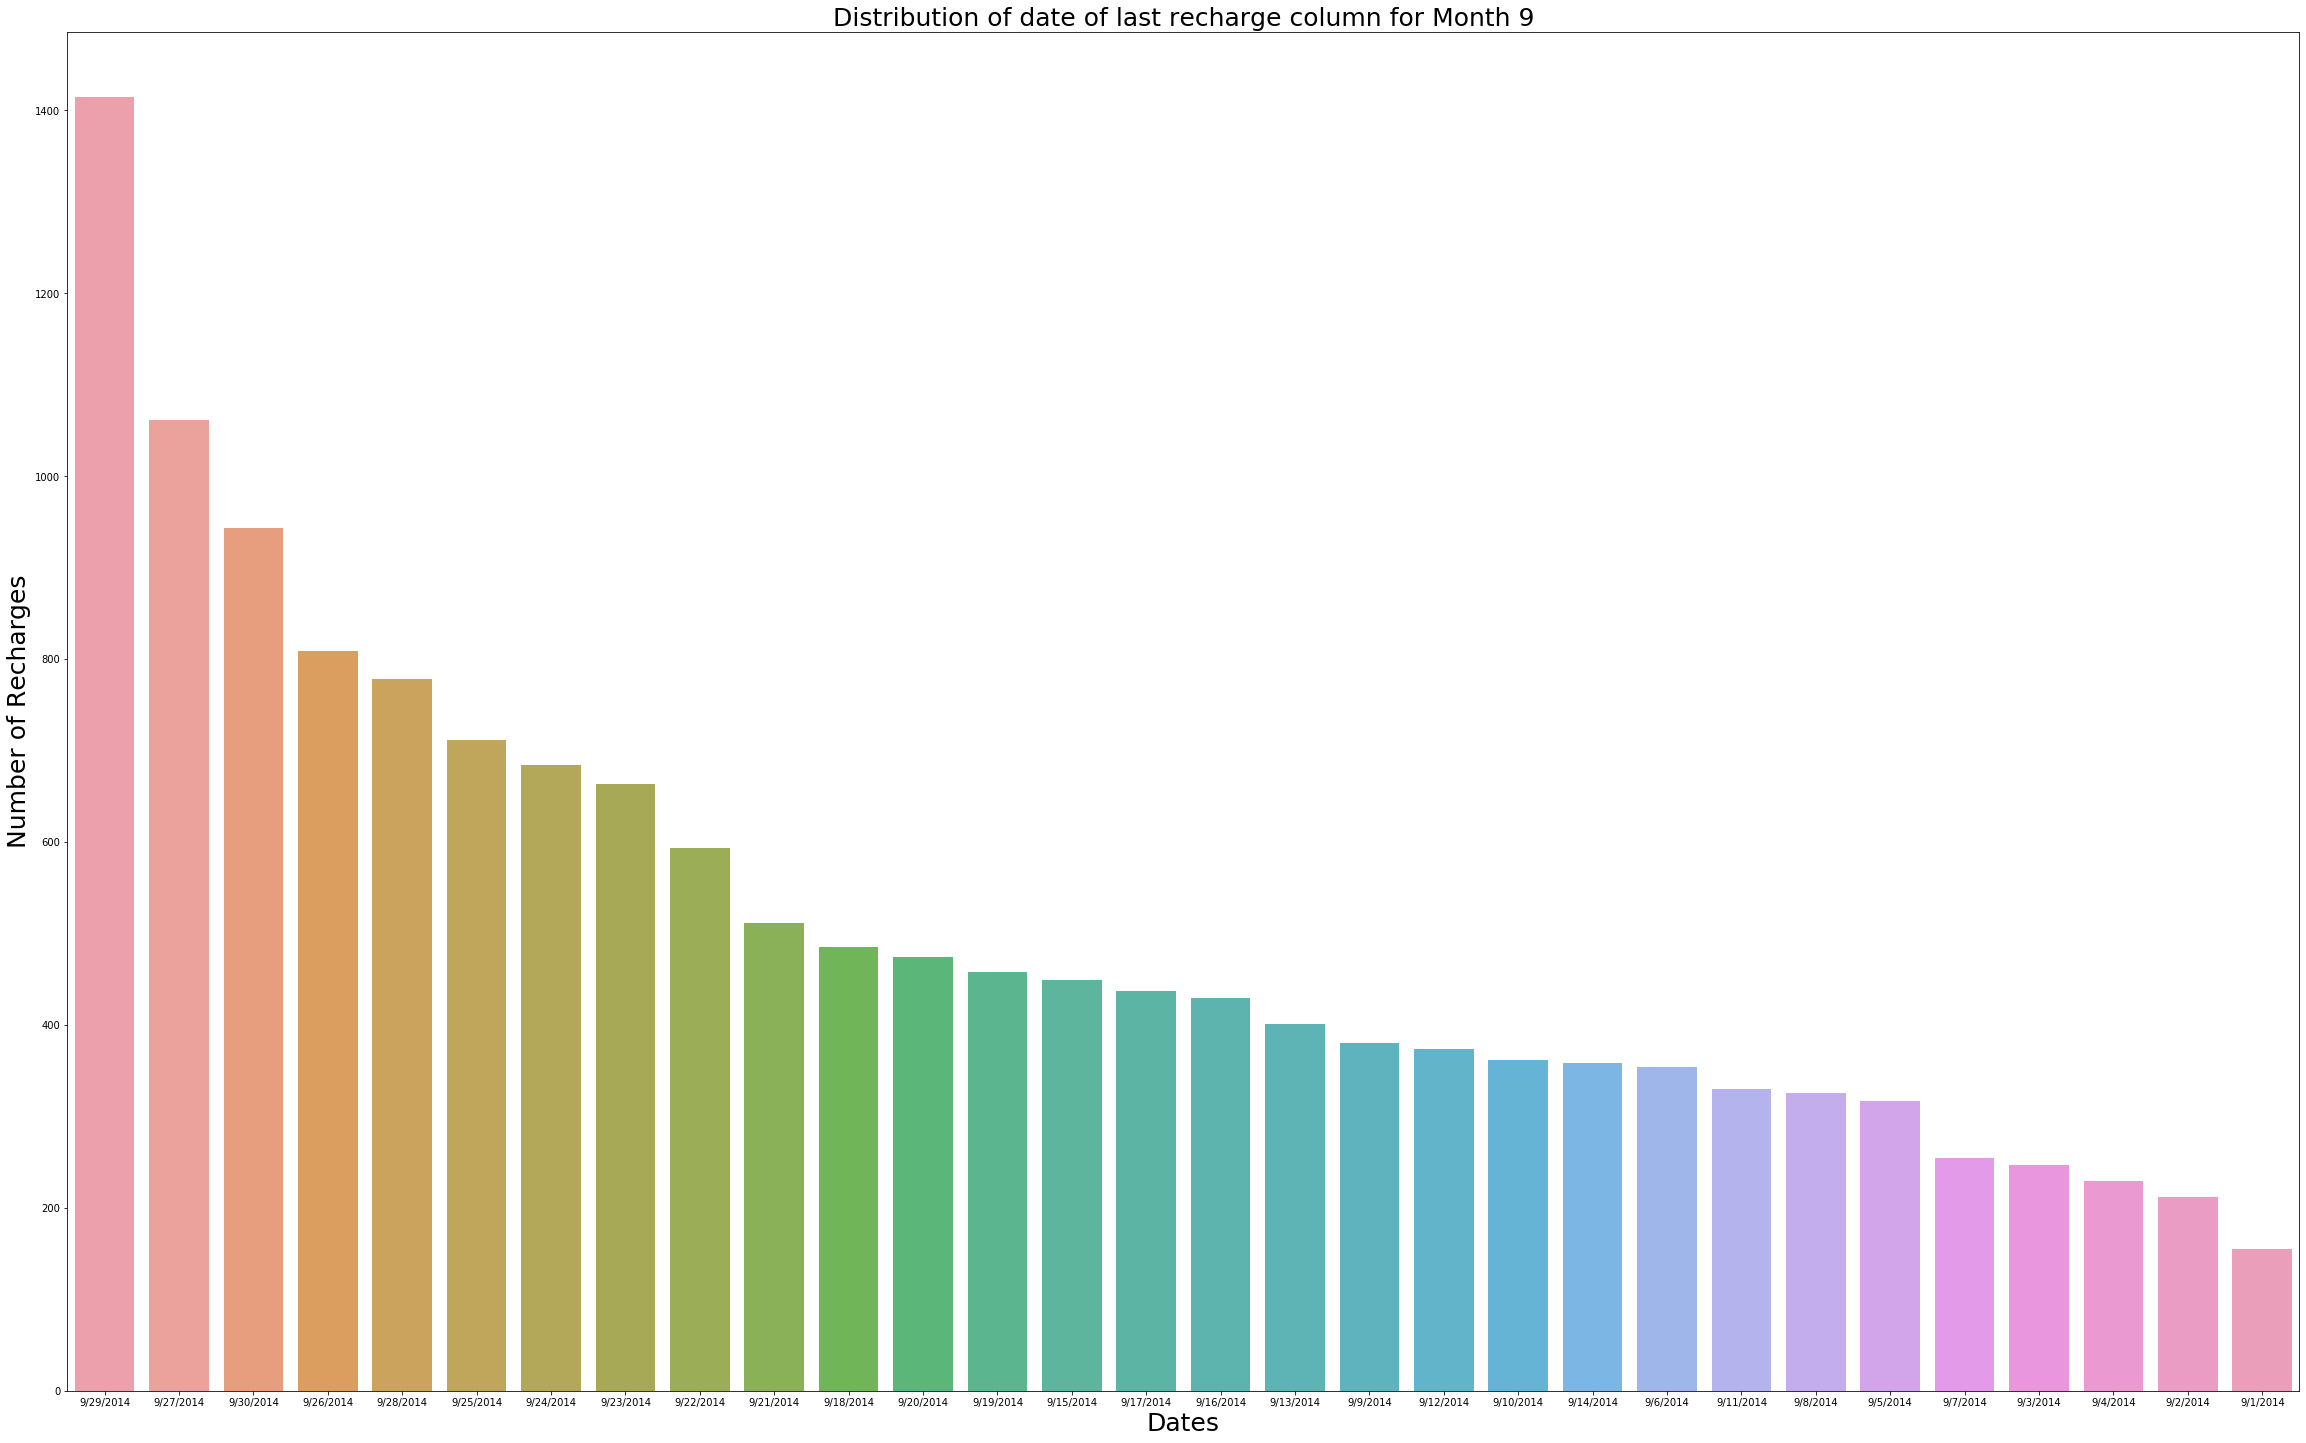

In [38]:
last_rech_data_9_count = telecom_churn_data_hvc.date_of_last_rech_data_9.value_counts()
plt.figure(figsize=(40,25))
sns.barplot(last_rech_data_9_count.index, last_rech_data_9_count.values, alpha=0.9)
plt.title('Distribution of date of last recharge column for Month 9', fontsize=25)
plt.ylabel('Number of Recharges', fontsize=25)
plt.xlabel('Dates', fontsize=25)
plt.show()

### Observation:

After investigating the column 'date_of_last_rech_data' for the months 6,7,8 and 9, we observe the following characteristics:

1. The count of recharge for a particular month increases steadily every day with the last date showing the maximum count.
2. These columns also have a high percentage of Null values (mostly above 40%) and share a similar percentage of null values      with total recharge data columns as well as average revenue per unit columns for each of the months 6,7,8 and 9.

3. Also certain columns like 'last_day_of_month' for 6,7,8 and 9th Month are of no use to us since they contain only one value in the entire data set.


### Treatment of these missing values.

One of the conventional approaches for treatment of high percentage of missing values is by replacing it with category having maximum count. However on seeing the data distribution here, we observe a gradual increase in the recharge counts each day for every month. Secondly null values present in the columns indicate that customers have not done any recharge on certain specific days every month. Also certain date columns have only one type of value in the entire dataset.

Since these date columns do not carry any significant advantage, its better to drop them. Hence we have decided to drop all the categorical columns.

In [39]:
telecom_churn_data_hvc.drop(list(categorical_data.columns), axis=1, inplace=True)

In [40]:
# checking the shape of the dataset...
telecom_churn_data_hvc.shape

(29953, 199)

In [41]:
categorical_data_hvc = telecom_churn_data_hvc.loc[:, telecom_churn_data_hvc.dtypes == np.object]
categorical_data_hvc.columns

Index([], dtype='object')

Now we dont have any columns in the categorical data. Also columns mobile number and circle_id is of no use to us so we are dropping them as well.

In [42]:
extra_columns = ["mobile_number", "circle_id"]
telecom_churn_data_hvc.drop(extra_columns, axis=1, inplace=True)

In [43]:
telecom_churn_data_hvc.shape

(29953, 197)

In [44]:
# Checking the nulls percentage in the entire data set again...
# Checking the count and percentage of null values in all columns of the dataframe.
total_null_count = []
total_null_count = list(telecom_churn_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(telecom_churn_data_hvc.isnull().sum()/len(telecom_churn_data_hvc) * 100)

total_columns = list(telecom_churn_data_hvc.columns)

null_percentage_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_df['Variables'] = total_columns
null_percentage_df['Null_Count'] = total_null_count
null_percentage_df['Null_Percentage'] = total_null_percentage

null_percentage_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
98,std_ic_t2t_mou_9,1898,6.336594
26,loc_og_t2t_mou_9,1898,6.336594
34,loc_og_t2f_mou_9,1898,6.336594
38,loc_og_t2c_mou_9,1898,6.336594
42,loc_og_mou_9,1898,6.336594
46,std_og_t2t_mou_9,1898,6.336594
50,std_og_t2m_mou_9,1898,6.336594
54,std_og_t2f_mou_9,1898,6.336594
62,std_og_mou_9,1898,6.336594
66,isd_og_mou_9,1898,6.336594


### Observation:

Now we have only numerical columns in our dataset which contain a low percentage of missing data (approx 6%). Here to impute these missing values, we can try out some advanced imputation technique.

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [46]:
# Performing Iterative Imputation technique for imputing missing data...
imp = IterativeImputer(max_iter=10, tol=0.001, n_nearest_features=4)

imp.fit(telecom_churn_data_hvc)
telecom_churn_data_hvc = pd.DataFrame(data=imp.transform(telecom_churn_data_hvc), dtype='float', columns=list(telecom_churn_data_hvc.columns))

In [47]:
# Checking for Nulls in imputed data...
# Checking the count and percentage of null values in all columns of the Imputed Dataframe....
total_null_count = []
total_null_count = list(telecom_churn_data_hvc.isnull().sum())

total_null_percentage = []
total_null_percentage = list(telecom_churn_data_hvc.isnull().sum()/len(telecom_churn_data_hvc) * 100)

total_columns = list(telecom_churn_data_hvc.columns)

null_percentage_df = pd.DataFrame(columns=['Variables', 'Null_Count', 'Null_Percentage'])

null_percentage_df['Variables'] = total_columns
null_percentage_df['Null_Count'] = total_null_count
null_percentage_df['Null_Percentage'] = total_null_percentage

null_percentage_df.sort_values(by=['Null_Percentage'], ascending=False)

,Variables,Null_Count,Null_Percentage
0,loc_og_t2o_mou,0,0.0
124,isd_ic_mou_7,0,0.0
126,isd_ic_mou_9,0,0.0
127,ic_others_6,0,0.0
128,ic_others_7,0,0.0
129,ic_others_8,0,0.0
130,ic_others_9,0,0.0
131,total_rech_num_6,0,0.0
132,total_rech_num_7,0,0.0
133,total_rech_num_8,0,0.0


In [48]:
# get the shape of the dataset
telecom_churn_data_hvc.shape

(29953, 197)

### Identifying Single or unique features...

Here we have identified features with single or unique value, because they won't be significant. Drop them

In [49]:
unique_stats = pd.DataFrame(telecom_churn_data_hvc.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

,feature,nunique
0,loc_og_t2o_mou,1
1,std_og_t2o_mou,1
2,loc_ic_t2o_mou,1
55,std_og_t2c_mou_6,1
56,std_og_t2c_mou_7,1
57,std_og_t2c_mou_8,1
58,std_og_t2c_mou_9,1
107,std_ic_t2o_mou_6,1
108,std_ic_t2o_mou_7,1
109,std_ic_t2o_mou_8,1


Here we have 11 features which have single or unique value and these will not be of any use to us. Hence we are dropping them.

In [50]:
single_unique_value_cols = []
single_unique_value_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                            'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
                            'std_ic_t2o_mou_9']

# dropping the columns..
telecom_churn_data_hvc.drop(single_unique_value_cols, axis=1, inplace=True)

In [51]:
# get the shape of the dataset...
telecom_churn_data_hvc.shape

(29953, 186)

Now we have treated all of our missing values and our dataset does not contain any null values. We have also filtered out the HVC(High Value Customers). At this step both our Data cleaning and filtering out high value customers is completed.

Now we need to derive the "Churn" variable.

## Data Preparation

### Deriving the Churn Variable.

After treating all the missing values in the dataset, we now need to derive the churn variable. For this we need to use the 9th Month Data.

One important tip is that any customer having (Data calling + Data usage) = 0 is a Churn data.

To derive the 'Churn' column, we have to make use of 9th month data. Here we will use columns

total_ic_mou_9,total_og_mou_9 = incoming and outgoing  calls for the 9th month

vol_2g_mb_9, vol_3g_mb_9 = Mobile internet usage volume (in MB) for 2g and 3g respectively for 9th month

If both (calling_time + data_usage) = 0, then its a churn case.


In [52]:
# creating derived column to calculate total calling time
telecom_churn_data_hvc['total_calls_9'] = telecom_churn_data_hvc.total_ic_mou_9 + telecom_churn_data_hvc.total_og_mou_9

# creating derived column to calculate total data usage 
telecom_churn_data_hvc['total_data_9'] = telecom_churn_data_hvc.vol_2g_mb_9 + telecom_churn_data_hvc.vol_3g_mb_9

# creating derived column to know the churned data, 0 = not churned, 1 = churned  
telecom_churn_data_hvc['churned_customer'] = telecom_churn_data_hvc.apply(lambda row: 1 if (row.total_calls_9== 0 and row.total_data_9 == 0) else 0, axis=1)

In [53]:
# calculating the churn ratio
print(telecom_churn_data_hvc.churned_customer.value_counts()*100/telecom_churn_data_hvc.shape[0])

0    91.877274
1     8.122726
Name: churned_customer, dtype: float64


In [54]:
# Get the churn data seperately...
churn_data = telecom_churn_data_hvc['churned_customer']
churn_data.head(10)

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: churned_customer, dtype: int64

Now that we have computed the churn variables, we now need to drop all the data related to 9th month. So basically we will be using data of 6th,7th and 8th month as our feature variables and column "churned_customer" will be our target variable.

In [55]:
telecom_churn_data_hvc = telecom_churn_data_hvc.drop(telecom_churn_data_hvc.filter(regex='_9|sep', axis = 1).columns, axis=1)
telecom_churn_data_hvc.shape

(29953, 137)

In [56]:
telecom_churn_data_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7,churned_customer
0,197.385,214.816,213.803,218.048477,176.44276,0.00,227.613607,359.090599,0.00,10.778516,13.840927,0.00,25.912315,15.365761,0.00,62.029412,34.507517,0.00,151.166733,63.937939,0.00,1.062277,2.518819,0.00,0.732767,1.410014,0.00,119.434328,66.856926,0.00,81.448395,156.479376,0.00,174.564852,58.847856,0.00,1.698131,2.074354,0.00,316.071064,347.28002,0.00,1.761913,-16.70431,0.00,4.397063,3.784273,0.00,0.572018,0.030217,0.0,0.00,0.00,0.00,11.215707,-3.557967,0.16,93.598428,47.838555,4.13,12.700997,3.438483,1.15,134.34984,67.942302,5.44,12.039436,3.352255,0.00,22.762726,26.003163,0.00,2.193907,2.549618,0.00,40.063014,38.523538,0.00,0.00,0.00,5.44,0.055654,0.024245,0.0,2.82617,5.559653,0.00,0.368559,0.118912,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,614.0,504.0,559.0,1
1,1069.180,1349.850,3171.480,57.840000,54.68000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.14000,77.84,0.000000,0.18000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.88000,355.230000,188.04,36.890000,11.830000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.06000,14.530000,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1
2,378.721,492.223,137

In [57]:
telecom_churn_data_hvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Columns: 137 entries, arpu_6 to churned_customer
dtypes: float64(136), int64(1)
memory usage: 31.3 MB


In [58]:
telecom_churn_data_hvc.isnull().sum()/len(telecom_churn_data_hvc) * 100

arpu_6                         0.0
arpu_7                         0.0
arpu_8                         0.0
onnet_mou_6                    0.0
onnet_mou_7                    0.0
onnet_mou_8                    0.0
offnet_mou_6                   0.0
offnet_mou_7                   0.0
offnet_mou_8                   0.0
roam_ic_mou_6                  0.0
roam_ic_mou_7                  0.0
roam_ic_mou_8                  0.0
roam_og_mou_6                  0.0
roam_og_mou_7                  0.0
roam_og_mou_8                  0.0
loc_og_t2t_mou_6               0.0
loc_og_t2t_mou_7               0.0
loc_og_t2t_mou_8               0.0
loc_og_t2m_mou_6               0.0
loc_og_t2m_mou_7               0.0
loc_og_t2m_mou_8               0.0
loc_og_t2f_mou_6               0.0
loc_og_t2f_mou_7               0.0
loc_og_t2f_mou_8               0.0
loc_og_t2c_mou_6               0.0
loc_og_t2c_mou_7               0.0
loc_og_t2c_mou_8               0.0
loc_og_mou_6                   0.0
loc_og_mou_7        

### Observation:

As we can see, we have not only completed the data cleaning part, but also derived the Churn variable. Now we can proceed to do some Exploratory Data Analysis and Data Preparation Phase before starting with the modelling part.

In [59]:
telecom_churn_data_hvc.describe(percentiles=[0.00,0.01, 0.02, 0.03,.05,.10,.25, .5, .75, .90, .95, .99], include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7,churned_customer
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301,264.345684,270.111522,235.313600,377.684328,384.545695,338.110462,16.446444,12.899583,12.907660,27.127094,20.514092,20.739374,85.730152,86.464619,80.3

### Observation

Here we see that almost all of the numerical columns have extreme maximum value which is very high as compared to vale at 99th percentile as well as at 0th percentile. So we would have to perform percentile capping here at both 99th and 1th percentile.

In [60]:
# function to perform max percentile capping...
def max_percentile_capping(col_name):
    # get the max cap value
    max_cap_value = telecom_churn_data_hvc[col_name].quantile([0.99]).values
    
    # perform percentile capping...
    telecom_churn_data_hvc[col_name][telecom_churn_data_hvc[col_name] >= max_cap_value[0]] = max_cap_value[0]
    
# function to perform min percentile capping...
def min_percentile_capping(col_name):
    # get the min cap value...
    min_cap_value = telecom_churn_data_hvc[col_name].quantile([0.01]).values
    
    # perform percentile capping...
    telecom_churn_data_hvc[col_name][telecom_churn_data_hvc[col_name] <= min_cap_value[0]] = min_cap_value[0]
    

In [61]:
total_columns = list(telecom_churn_data_hvc.columns)

# Iteratively perform percentile capping on max capped values i.e at 99th percentile....
for col in total_columns:
    if str(col).strip() == 'churned_customer':
        pass
    else:
        max_percentile_capping(str(col))


In [62]:
telecom_churn_data_hvc.describe(percentiles=[0.00,0.01, 0.02, 0.03,.05,.10,.25, .5, .75, .90, .95, .99], include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7,churned_customer
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,548.886461,551.105294,498.447779,255.671799,260.910138,226.087536,369.910992,375.948262,328.083199,13.916200,9.898164,10.165108,23.288284,17.051209,16.853148,77.512639,77.465210,71.964

In [63]:
# Now performing percentile capping at 1th percentile or min_capped_values.....
for col in total_columns:
    if str(col).strip() == 'churned_customer':
        pass
    else:
        min_percentile_capping(str(col))

In [64]:
telecom_churn_data_hvc.describe(percentiles=[0.00,0.01, 0.02, 0.03,.05,.10,.25, .5, .75, .90, .95, .99], include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7,churned_customer
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.00000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,549.128498,551.447995,498.520032,255.679572,261.083883,226.457418,369.917900,375.955193,328.091801,13.916200,9.898582,10.184047,23.288508,17.052655,16.853266,77.512667,77.465210,71.964

### Observation: Here we have completed the outlier treatment as well and now we do not have any extreme anomaly values.

### Data Imbalance:

- Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets.
    For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%,
    it is usually referred to as a rare event.
- Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class



Text(0.5, 1.0, 'Churn status Distribution')

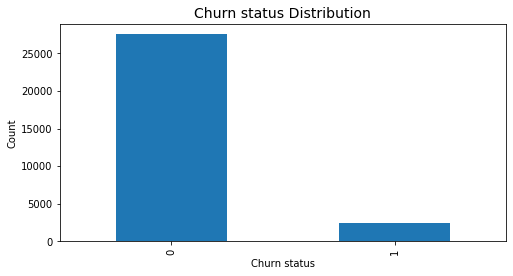

In [65]:
plt.figure(figsize=(8,4))
telecom_churn_data_hvc['churned_customer'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

### Importing libraries for Model Building...

Here we need to import different libraries for model building activity.

In [303]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Split the data into train and test...

In [67]:
# set the features and labels...
features = telecom_churn_data_hvc[telecom_churn_data_hvc.columns[~telecom_churn_data_hvc.columns.isin(['churned_customer'])]]
labels = telecom_churn_data_hvc['churned_customer']

In [68]:
# split into train and test...
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.7,test_size=0.3,random_state=100)

In [69]:
print("Training dataset Shape : ",features_train.shape)
print("Testing dataset Shape : ",features_test.shape)

Training dataset Shape :  (20967, 136)
Testing dataset Shape :  (8986, 136)


### Dealing with the problem of data imbalance:

Resampling Techniques — Oversample minority class
This method begins our resampling techniques.
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

We have our train and test data split and now we can perform this Random Oversampling on the train split data.

In [70]:
# concatenate our training data back together
train_data_full = pd.concat([features_train, labels_train], axis=1)

In [71]:
train_data_full.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7,churned_customer
5067,570.375,870.036,657.427,214.18,197.56,145.96,575.96,766.01,1211.56,265.86,282.374,0.00,406.18,439.1996,0.00,9.06,16.98,72.49,61.84,17.14,185.83,42.43,1.48,6.09,0.0,1.00,8.43,113.34,35.61,264.43,148.53,42.78,73.46,120.58,125.24,958.33,1.50,0.0,35.512,270.61,168.03,1085.49,0.0,0.0,4.8,0.00,1.00,8.43,0.93,0.0,0.0,384.89,204.64,1363.16,0.70,0.55,0.00,122.64,30.54,78.03,14.78,0.00,41.96,138.13,31.09,119.99,4.20,7.14,61.39,41.04,20.03,215.19,0.00,0.00,3.91,45.24,27.18,280.51,183.38,78.33,494.41,0.00,0.00,0.11,0.0,20.04,93.78,0.00,0.00,0.0,6.0,9.0,9.0,692.0,1024.0,885.0,128.0,128.0,144.0,128.0,128.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,498.0,0.00,0.00,0.0,692.0,1024.0,858.0,0
25362,767.361,149.368,26.508,373.13,61.74,4.11,778.64,146.41,2.69,0.00,2.090,7.11,0.00,1.0000,6.81,57.68,2.09,0.00,69.54,6.09,0.00,3.75,0.00,0.00,0.0,0.21,0.00,130.98,8.19,0.00,315.44,59.64,0.00,697.76,118.49,0.00,7.58,0.0,0.000,1020.79,178.14,0.00,0.0,0.0,0.0,9.88,46.43,0.00,3.78,0.0,0.0,1165.44,232.78,0.00,222.14,188.34,0.00,49.24,39.06,0.00,2.96,0.70,0.00,274.36,228.11,0.00,30.43,12.06,0.00,92.11,200.64,0.00,45.31,11.55,0.00,167.86,224.26,0.00,442.66,461.33,0.00,0.03,0.00,0.00,0.0,0.00,0.00,0.40,8.95,0.0,12.0,11.0,4.0,820.0,164.0,30.0,110.0,50.0,30.0,50.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0,0.00,0.00,0.0,820.0,164.0,492.0,0
10076,177.840,116.427,167.601,0.98,0.26,5.09,35.91,8.58,72.63,0.00,0.000,0.00,0.00,0.0000,0.00,0.00,0.26,5.09,31.23,7.88,72.63,0.00,0.70,0.00,0.0,0.00,0.00,31.23,8.84,77.73,0.98,0.00,0.00,4.68,0.00,0.00,0.00,0.0,0.000,5.66,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.00,0.0,0.0,36.89,8.84,77.74,69.14,143.33,8.09,52.83,9.59,111.28,4.64,0.00,0.40,126.63,152.93,119.78,0.00,1.93,6.39,0.00,1.80,0.00,0.00,0.00,0.00,0.00,3.73,6.39,127.19,156.93,126.18,0.00,0.13,0.00,0.0,0.00,0.00,0.56,0.13,0

In [72]:
# separate minority and majority classes
not_churned = train_data_full[train_data_full.churned_customer == 0]
churned = train_data_full[train_data_full.churned_customer == 1]

print("Length of Not Churned data is : {0}".format(len(not_churned)))
print("Length of Churned data is : {0}".format(len(churned)))

Length of Not Churned data is : 19215
Length of Churned data is : 1752


In [73]:
# upsample churn class i.e churned_customer == 1 
churn_upsampled = resample(churned, replace=True, n_samples=len(not_churned), random_state=27) 

In [74]:
print("Length of Churn Upsampled is : {0}".format(len(churn_upsampled)))

Length of Churn Upsampled is : 19215


In [75]:
# combine majority and upsampled minority
upsampled_total = pd.concat([not_churned, churn_upsampled])

In [76]:
# check new class counts
upsampled_total.churned_customer.value_counts()

1    19215
0    19215
Name: churned_customer, dtype: int64

In [77]:
# trying to balanced dataset
labels_train = upsampled_total.churned_customer
features_train = upsampled_total.drop('churned_customer', axis=1)

In [78]:
print("Length of features for train data : ", len(features_train))
print("Length of labels for train data : ", len(labels_train))

Length of features for train data :  38430
Length of labels for train data :  38430


### Observation: 

Now we can see that we have completed the problem of data imbalance by Random Oversampling technique and our class labels are balanced. We can now perform feature scaling and modelling process.

### Feature Scaling

Here we will scale the features of our training data.

In [79]:
scaler = StandardScaler()
train_columns = list(features_train.columns)

features_train[train_columns] = scaler.fit_transform(features_train[train_columns])

In [80]:
features_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7
5067,-0.041747,0.877025,0.729590,-0.185062,-0.164396,-0.084991,0.336958,0.835098,2.627267,4.359972,5.495856,-0.328762,3.875950,5.071266,-0.376877,-0.423926,-0.339008,0.151824,-0.397023,-0.598683,0.435043,2.987429,-0.246723,0.169678,-0.347538,-0.137517,1.732765,-0.342773,-0.570083,0.312843,-0.147173,-0.379007,-0.172822,-0.260835,-0.199437,2.922617,0.046538,-0.237525,8.384233,-0.284296,-0.402731,1.712753,-0.188396,-0.035482,0.609544,-0.487426,-0.422378,0.314540,0.159987,-0.176096,0.001373,-0.393615,-0.583184,1.694165,-0.568941,-0.542716,-0.491081,-0.048414,-0.549367,-0.204459,0.119744,-0.390974,1.397588,-0.239501,-0.633994,-0.188572,-0.280561,-0.170084,1.843513,0.247745,-0.106923,4.460198,-0.265353,-0.266801,0.448184,-0.000999,-0.187558,3.500989,-0.228766,-0.527711,1.164889,-0.451354,-0.238520,1.274745,-0.269165,0.338662,3.034414,-0.255686,-0.243406,-0.252336,-0.709564,-0.262399,0.168967,-0.010390,0.854800,1.001188,-0.244441,-0.205814,0.137994,0.264578,0.356033,0.656585,-0.612625,-0.594958,-0.487827,-0.692042,-0.651008,-0.533763,-0.701790,-0.656428,-0.519710,-0.423193,-0.393674,-0.315771,-0.446219,-0.422223,-0.368180,-0.356197,-0.346700,-0.294581,-0.440832,-0.440104,-0.362317,-0.382789,-0.363226,-0.303919,-0.287054,-0.260112,-0.215227,-0.623865,-0.365835,-0.404795,-0.40695,-0.423153,-0.011666,-0.259511
25362,0.456679,-1.018861,-0.901895,0.168136,-0.483110,-0.490896,0.750991,-0.513154,-0.681606,-0.302349,-0.264271,-0.178533,-0.318843,-0.325250,-0.284802,-0.069284,-0.451741,-0.464227,-0.357736,-0.657762,-0.690931,-0.090284,-0.371696,-0.365327,-0.347538,-0.311628,-0.359026,-0.284096,-0.664800,-0.673963,0.265394,-0.334502,-0.416248,1.115949,-0.216249,-0.420206,1.197557,-0.237525,-0.232760,0.882391,-0.386260,-0.515178,-0.188396,-0.035482,-0.208276,0.353450,3.026428,-0.500907,1.900644,-0.176096,0.001373,0.698360,-0.542170,-0.665230,1.925719,1.548252,-0.491081,-0.475923,-0.497253,-0.711070,-0.312481,-0.366803,-0.384986,0.308715,0.168705,-0.708622,0.532337,-0.017993,-

In [81]:
features_train.shape

(38430, 136)

## Model Building Activity...

### Building Interpretable Model: 
1.Here we will build one baseline model with Hyperparameter tuning and determining the accuracy metrics. Since this is a binary   classification problem, we will choose Logistic Regression as our primary baseline model. This Modelling is done without PCA.

### Model 1.0 : Logistic Regression Model with no PCA

In [82]:
import statsmodels.api as sm

In [83]:
# Logistic regression model
logm1 = sm.GLM(labels_train,(sm.add_constant(features_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       churned_customer   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38293
Model Family:                Binomial   Df Model:                          136
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14585.
Date:                Mon, 18 May 2020   Deviance:                       29170.
Time:                        17:19:35   Pearson chi2:                 1.40e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0024      0.023      0.104      0.917      -0.043       0.047
arpu_6                         -0.0413      0.055     -0.752      0.452      -0.149       0.066
arpu_7                          0.1557      0.057      2.749      0.006       0.045       0.267
arpu_8                          0.4848      0.062      7.795      0.000       0.363       0.607
onnet_mou_6                     0.0965      0.128      0.754      0.451      -0.154       0.347
onnet_mou_7                     0.5188      0.142      3.643      0.000       0.240       0.798
onnet_mou_8                    -0.5694      0.115     -4.952      0.000      -0.795      -0.344
offnet_mou_6                    0.1061      0.123      0.861      0.389      -0.136       0.348
offnet_mou_7                    1.4801      0.137     10.795      0.000       1.211       1.749
offnet_mou_8                   -1.2926      0.102    -12.721      0.000      -1.492      -1.093
roam_ic_mou_6                  -0.0209      0.032     -0.660      0.509      -0.083       0.041
roam_ic_mou_7                   0.1258      0.034      3.688      0.000       0.059       0.193
roam_ic_mou_8                  -0.0325      0.028     -1.144      0.253      -0.088       0.023
roam_og_mou_6                   0.0268      0.040      0.673      0.501      -0.051       0.105
roam_og_mou_7                  -0.1195      0.042     -2.818      0.005      -0.203      -0.036
roam_og_mou_8                   0.4124      0.035     11.656      0.000       0.343       0.482
loc_og_t2t_mou_6                0.1374      0.085      1.609      0.108      -0.030       0.305
loc_og_t2t_mou_7               -0.3710      0.088     -4.201      0.000      -0.544      -0.198
loc_og_t2t_mou_8                0.4501      0.105      4.279      0.000       0.244       0.656
loc_og_t2m_mou_6                0.0477      0.110      0.434      0.664      -0.167       0.263
loc_og_t2m_mou_7               -1.0336      0.124     -8.337      0.000      -1.277      -0.791
loc_og_t2m_mou_8                1.0955      0.130      8.420      0.000       0.840       1.350
loc_og_t2f_mou_6                0.1327      0.029      4.581      0.000       0.076       0.189
loc_og_t2f_mou_7               -0.3562      0.032    -10.974      0.000      -0.420      -0.293
loc_og_t2f_mou_8                0.1978      0.029      6.899      0.000       0.142       0.254
loc_og_t2c_mou_6               -0.0216      0.019     -1.161      0.246      -0.058       0.015
loc_og_t2c_mou_7               -0.0253      0.021     -1.203      0.229      -0.066       0.016
loc_og_t2c_mou_8                0.1228      0.020      6.203      0.000       0.084       0.162
loc_og_mou_6                   -0.2045      0.183     -1.117      0.264      -0.563       0.154
loc_og_mou_

### Feature selection using RFE...

In [84]:
#RFE technique
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 80)             # running RFE with 80 variables as output
rfe = rfe.fit(features_train, labels_train)

In [85]:
list(zip(features_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 39),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 21),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 45),
 ('roam_ic_mou_7', False, 11),
 ('roam_ic_mou_8', False, 32),
 ('roam_og_mou_6', False, 42),
 ('roam_og_mou_7', False, 12),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 56),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 37),
 ('loc_og_t2c_mou_7', False, 40),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 7),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_

In [86]:
useful_columns = features_train.columns[rfe.support_]
print(useful_columns, len(useful_columns))

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_7', 'og_others_7', 'og_others_8', 'total_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'std_ic_t2m_mou_7', 'std_ic_mou_6',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',

### Iteration 1:  Building Model using 80 variables.

In [87]:
features_train_sm = sm.add_constant(features_train[useful_columns])
logm1 = sm.GLM(labels_train,features_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       churned_customer   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38349
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14701.
Date:                Mon, 18 May 2020   Deviance:                       29402.
Time:                        17:20:43   Pearson chi2:                 7.83e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0230      0.021      1.088      0.277      -0.018       0.064
arpu_7                          0.1966      0.053      3.704      0.000       0.093       0.301
arpu_8                          0.4040      0.059      6.812      0.000       0.288       0.520
onnet_mou_7                     0.4928      0.104      4.729      0.000       0.289       0.697
onnet_mou_8                    -0.4995      0.112     -4.461      0.000      -0.719      -0.280
offnet_mou_6                    0.0863      0.080      1.080      0.280      -0.070       0.243
offnet_mou_7                    1.3555      0.104     13.094      0.000       1.153       1.558
offnet_mou_8                   -1.1961      0.096    -12.474      0.000      -1.384      -1.008
roam_og_mou_8                   0.3828      0.027     14.042      0.000       0.329       0.436
loc_og_t2t_mou_6                0.1097      0.041      2.677      0.007       0.029       0.190
loc_og_t2t_mou_7               -0.3678      0.080     -4.580      0.000      -0.525      -0.210
loc_og_t2t_mou_8                0.5105      0.096      5.342      0.000       0.323       0.698
loc_og_t2m_mou_7               -1.0109      0.110     -9.222      0.000      -1.226      -0.796
loc_og_t2m_mou_8                1.1703      0.113     10.371      0.000       0.949       1.391
loc_og_t2f_mou_6                0.1349      0.028      4.874      0.000       0.081       0.189
loc_og_t2f_mou_7               -0.3544      0.031    -11.353      0.000      -0.416      -0.293
loc_og_t2f_mou_8                0.2037      0.027      7.482      0.000       0.150       0.257
loc_og_t2c_mou_8                0.1243      0.015      8.372      0.000       0.095       0.153
loc_og_mou_7                    0.7582      0.153      4.951      0.000       0.458       1.058
loc_og_mou_8                   -0.1166      0.151     -0.771      0.440      -0.413       0.180
std_og_t2t_mou_6                0.7256      0.076      9.487      0.000       0.576       0.876
std_og_t2t_mou_7               -0.8672      0.121     -7.163      0.000      -1.104      -0.630
std_og_t2t_mou_8               -0.2044      0.111     -1.841      0.066      -0.422       0.013
std_og_t2m_mou_6                0.5769      0.101      5.689      0.000       0.378       0.776
std_og_t2m_mou_7               -1.4454      0.114    -12.700      0.000      -1.668      -1.222
std_og_t2m_mou_8                0.3225      0.098      3.303      0.001       0.131       0.514
std_og_t2f_mou_8               -0.1175      0.019     -6.341      0.000      -0.154      -0.081
std_og_mou_6                   -0.3433      0.146     -2.352      0.019      -0.629      -0.057
std_og_mou_7                    0.7842      0.131      5.980      0.000       0.527       1.041
std_og_mou_

### Checking VIF...

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = features_train[useful_columns].columns
vif['VIF'] = [variance_inflation_factor(features_train[useful_columns].values, i) for i in range(features_train[useful_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,std_og_mou_6,81.28
17,loc_og_mou_7,53.96
20,std_og_t2t_mou_7,49.96
79,AVG_Amount_Calling_Data_6_7,48.60
40,loc_ic_mou_6,44.79
27,std_og_mou_7,40.73
2,onnet_mou_7,39.97
22,std_og_t2m_mou_6,39.43
60,total_rech_data_6,38.35
6,offnet_mou_8,37.55


Here we need to filter out those columns which have a very high value of VIF. Here we will consider VIF values uptill 3.

In [90]:
vif_filtered = vif[vif['VIF'] < 3.0]
vif_filtered

,Features,VIF
56,max_rech_amt_6,2.99
13,loc_og_t2f_mou_6,2.99
7,roam_og_mou_8,2.77
64,max_rech_data_8,2.75
50,isd_ic_mou_8,2.66
43,std_ic_mou_8,2.49
62,total_rech_data_8,2.48
41,std_ic_t2m_mou_7,2.34
75,aug_vbc_3g,2.32
76,jul_vbc_3g,2.25


In [91]:
print(vif_filtered.shape)
useful_columns = list()
useful_columns = list(vif_filtered.Features)

(23, 2)


### Iteration 2: Building Model on 18 variables...

In [92]:
features_train_sm_2 = sm.add_constant(features_train[useful_columns])
logm2 = sm.GLM(labels_train,features_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       churned_customer   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38406
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19128.
Date:                Mon, 18 May 2020   Deviance:                       38256.
Time:                        17:21:19   Pearson chi2:                 6.83e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1569      0.014    -11.495      0.000      -0.184      -0.130
max_rech_amt_6         0.2251      0.016     14.026      0.000       0.194       0.257
loc_og_t2f_mou_6       0.0684      0.015      4.433      0.000       0.038       0.099
roam_og_mou_8          0.4469      0.016     28.766      0.000       0.416       0.477
max_rech_data_8       -0.2633      0.020    -13.465      0.000      -0.302      -0.225
isd_ic_mou_8           0.0472      0.013      3.496      0.000       0.021       0.074
std_ic_mou_8          -0.2222      0.017    -13.217      0.000      -0.255      -0.189
total_rech_data_8     -0.6863      0.021    -33.461      0.000      -0.727      -0.646
std_ic_t2m_mou_7       0.0679      0.016      4.375      0.000       0.037       0.098
aug_vbc_3g            -0.3614      0.025    -14.370      0.000      -0.411      -0.312
jul_vbc_3g             0.2891      0.020     14.316      0.000       0.249       0.329
og_others_7            0.5217      0.020     26.236      0.000       0.483       0.561
vol_2g_mb_7            0.2102      0.018     11.557      0.000       0.175       0.246
last_day_rch_amt_8    -0.7489      0.017    -42.982      0.000      -0.783      -0.715
vol_2g_mb_8           -0.2205      0.022     -9.863      0.000      -0.264      -0.177
monthly_2g_7          -0.1553      0.018     -8.867      0.000      -0.190      -0.121
monthly_2g_8          -0.1773      0.021     -8.493      0.000      -0.218      -0.136
isd_og_mou_7           0.0464      0.014      3.212      0.001       0.018       0.075
loc_ic_t2f_mou_8      -0.3942      0.021    -18.534      0.000      -0.436      -0.352
og_others_8           -0.1516      0.015    -10.272      0.000      -0.180      -0.123
aon                   -0.3519      0.014    -25.405      0.000      -0.379      -0.325
std_og_t2f_mou_8      -0.0434      0.015     -2.970      0.003      -0.072      -0.015
loc_og_t2c_mou_8      -0.0084      0.013     -0.664      0.507      -0.033       0.016
spl_ic_mou_8          -0.3561      0.017    -20.470      0.000      -0.390      -0.322
======================================================================================
"""

Dropping 2 variables sachet_3g_6 and loc_og_t2f_mou_8 since their p-value is above standard level of confidence (alpha = 0.05)..

In [93]:
vif_filtered = vif_filtered[(vif_filtered['Features'] != 'sachet_3g_6') & (vif_filtered['Features'] != 'loc_og_t2f_mou_8')]
vif_filtered

,Features,VIF
56,max_rech_amt_6,2.99
13,loc_og_t2f_mou_6,2.99
7,roam_og_mou_8,2.77
64,max_rech_data_8,2.75
50,isd_ic_mou_8,2.66
43,std_ic_mou_8,2.49
62,total_rech_data_8,2.48
41,std_ic_t2m_mou_7,2.34
75,aug_vbc_3g,2.32
76,jul_vbc_3g,2.25


In [94]:
print(vif_filtered.shape)
useful_columns = list()
useful_columns = list(vif_filtered.Features)

(23, 2)


### Plotting a Correlation Heatmap to understand the correlation between the features.

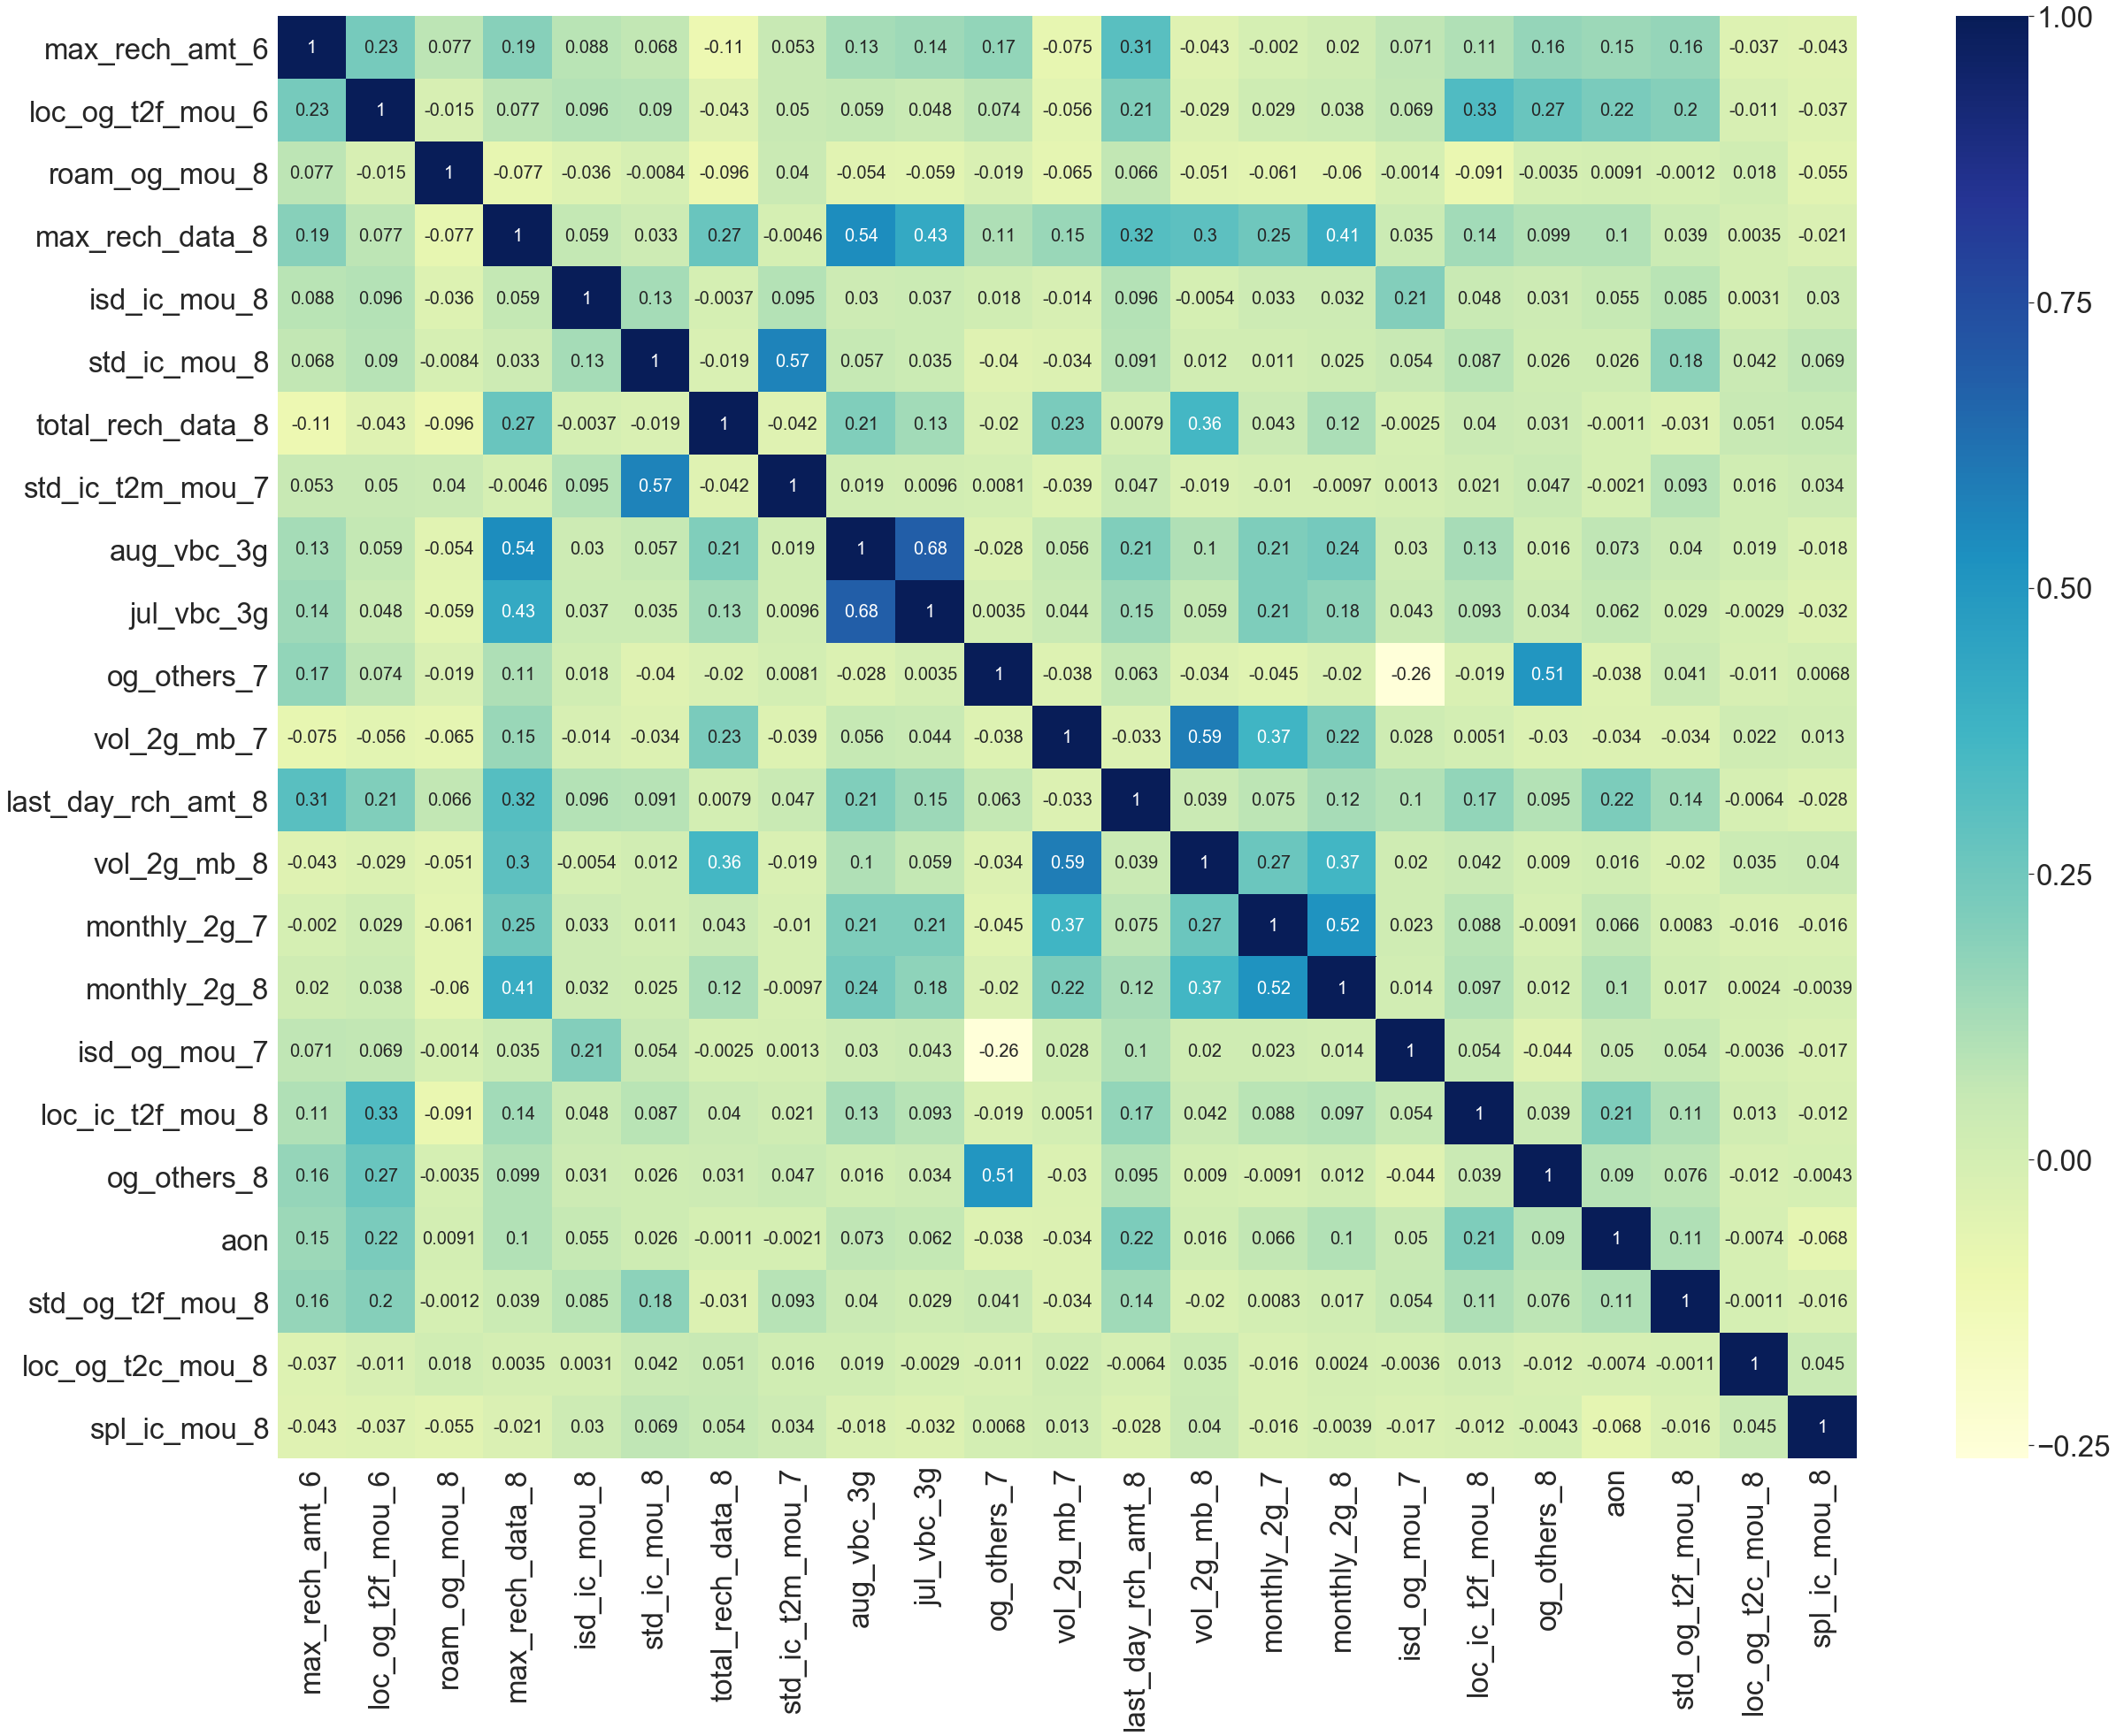

In [95]:
sns.set(font_scale=3)
plt.figure(figsize = (40, 30))
ax=sns.heatmap(features_train[useful_columns].corr(), annot = True, cmap="YlGnBu",annot_kws={"size":20})
bottom,top= ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)
plt.show()

### Observation:

Here we do not see a very high correlation between variables except for certain variables like 'isd_ic_mou_6', 'isd_ic_mou_8' and volume of data consumed in July and August.

### Iteration 3: Building model using 23 variables...

In [96]:
features_train_sm_3 = sm.add_constant(features_train[useful_columns])
logm3 = sm.GLM(labels_train,features_train_sm_3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       churned_customer   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38406
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19128.
Date:                Mon, 18 May 2020   Deviance:                       38256.
Time:                        17:21:25   Pearson chi2:                 6.83e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1569      0.014    -11.495      0.000      -0.184      -0.130
max_rech_amt_6         0.2251      0.016     14.026      0.000       0.194       0.257
loc_og_t2f_mou_6       0.0684      0.015      4.433      0.000       0.038       0.099
roam_og_mou_8          0.4469      0.016     28.766      0.000       0.416       0.477
max_rech_data_8       -0.2633      0.020    -13.465      0.000      -0.302      -0.225
isd_ic_mou_8           0.0472      0.013      3.496      0.000       0.021       0.074
std_ic_mou_8          -0.2222      0.017    -13.217      0.000      -0.255      -0.189
total_rech_data_8     -0.6863      0.021    -33.461      0.000      -0.727      -0.646
std_ic_t2m_mou_7       0.0679      0.016      4.375      0.000       0.037       0.098
aug_vbc_3g            -0.3614      0.025    -14.370      0.000      -0.411      -0.312
jul_vbc_3g             0.2891      0.020     14.316      0.000       0.249       0.329
og_others_7            0.5217      0.020     26.236      0.000       0.483       0.561
vol_2g_mb_7            0.2102      0.018     11.557      0.000       0.175       0.246
last_day_rch_amt_8    -0.7489      0.017    -42.982      0.000      -0.783      -0.715
vol_2g_mb_8           -0.2205      0.022     -9.863      0.000      -0.264      -0.177
monthly_2g_7          -0.1553      0.018     -8.867      0.000      -0.190      -0.121
monthly_2g_8          -0.1773      0.021     -8.493      0.000      -0.218      -0.136
isd_og_mou_7           0.0464      0.014      3.212      0.001       0.018       0.075
loc_ic_t2f_mou_8      -0.3942      0.021    -18.534      0.000      -0.436      -0.352
og_others_8           -0.1516      0.015    -10.272      0.000      -0.180      -0.123
aon                   -0.3519      0.014    -25.405      0.000      -0.379      -0.325
std_og_t2f_mou_8      -0.0434      0.015     -2.970      0.003      -0.072      -0.015
loc_og_t2c_mou_8      -0.0084      0.013     -0.664      0.507      -0.033       0.016
spl_ic_mou_8          -0.3561      0.017    -20.470      0.000      -0.390      -0.322
======================================================================================
"""

In [97]:
# Check for VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = features_train[useful_columns].columns
vif['VIF'] = [variance_inflation_factor(features_train[useful_columns].values, i) for i in range(features_train[useful_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,aug_vbc_3g,2.24
9,jul_vbc_3g,1.94
13,vol_2g_mb_8,1.89
3,max_rech_data_8,1.88
11,vol_2g_mb_7,1.72
15,monthly_2g_8,1.65
14,monthly_2g_7,1.58
5,std_ic_mou_8,1.55
10,og_others_7,1.55
7,std_ic_t2m_mou_7,1.49


### Observation: 
We have now built an optimized model using p-value and RFE technique as our hyperparameter tuning. We can now go ahead and check for accuracy metrics.

### Making predictions on both Train and Test set.

In [152]:
# predictions on train set...
labels_train_pred = res.predict(sm.add_constant(features_train[useful_columns]))
labels_train_pred[:10]

5067     0.120921
25362    0.780540
10076    0.277016
7679     0.358468
14966    0.043277
27690    0.211216
6262     0.588670
1424     0.667599
18887    0.072160
21093    0.118245
dtype: float64

In [153]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

labels_train_pred_final = pd.DataFrame({'Churned':labels_train.values, 'Churned_prediction':labels_train_pred})
labels_train_pred_final.head()

,Churned,Churned_prediction
5067,0,0.120921
25362,0,0.780540
10076,0,0.277016
7679,0,0.358468
14966,0,0.043277


In [154]:
labels_train_pred_final['Churn_Predicted'] = labels_train_pred_final.Churned_prediction.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
labels_train_pred_final.head()

,Churned,Churned_prediction,Churn_Predicted
5067,0,0.120921,0
25362,0,0.780540,1
10076,0,0.277016,0
7679,0,0.358468,0
14966,0,0.043277,0


In [155]:
# Confusion matrix 
confusion = confusion_matrix(labels_train_pred_final.Churned, labels_train_pred_final.Churn_Predicted )
print("Confution Matrix is : ")
print(confusion)

[[13898  5317]
 [ 3191 16024]]


In [157]:
# Let's check the overall accuracy.
print("Accuracy Score is : ")
print(accuracy_score(labels_train_pred_final.Churned, labels_train_pred_final.Churn_Predicted))

Accuracy Score is : 
0.7786104605776737


#### As per our problem statement we would require to check other metrics as we need high sensitivity of data as well

In [158]:
# Check for precision score....
print("Precision Score is : ")
print(precision_score(labels_train_pred_final.Churned, labels_train_pred_final.Churn_Predicted))

Precision Score is : 
0.7508551614263624


In [159]:
# check for recall score or sensitivity...
print("Recall Score is : ")
print(recall_score(labels_train_pred_final.Churned, labels_train_pred_final.Churn_Predicted))

Recall Score is : 
0.8339318240957585


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [160]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [161]:
fpr, tpr, thresholds = roc_curve( labels_train_pred_final.Churned, labels_train_pred_final.Churn_Predicted, drop_intermediate = False )

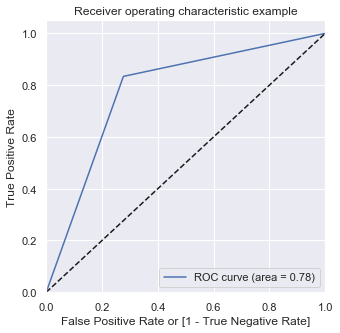

In [163]:
sns.set(font_scale=1)
draw_roc(labels_train_pred_final.Churned, labels_train_pred_final.Churn_Predicted)

### Finding the Optimal Cutoff point...

In [168]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    labels_train_pred_final[i]= labels_train_pred_final.Churned_prediction.map(lambda x: 1 if x > i else 0)
labels_train_pred_final.head()

,Churned,Churned_prediction,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5067,0,0.120921,0,1,1,0,0,0,0,0,0,0,0
25362,0,0.780540,1,1,1,1,1,1,1,1,1,0,0
10076,0,0.277016,0,1,1,1,0,0,0,0,0,0,0
7679,0,0.358468,0,1,1,1,1,0,0,0,0,0,0
14966,0,0.043277,0,1,0,0,0,0,0,0,0,0,0


In [169]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(labels_train_pred_final.Churned, labels_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.622378  0.976060  0.268696
0.2   0.2  0.681629  0.949415  0.413843
0.3   0.3  0.719750  0.916211  0.523289
0.4   0.4  0.755634  0.888160  0.623107
0.5   0.5  0.778610  0.833932  0.723289
0.6   0.6  0.781213  0.750559  0.811866
0.7   0.7  0.758756  0.613219  0.904294
0.8   0.8  0.599219  0.230861  0.967577
0.9   0.9  0.535441  0.083841  0.987041


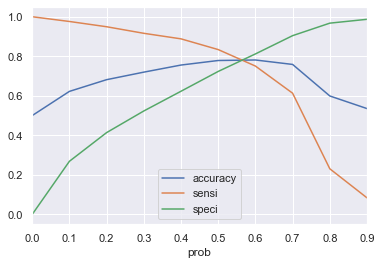

In [170]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [171]:
labels_train_pred_final['final_predicted'] = labels_train_pred_final.Churned_prediction.map( lambda x: 1 if x > 0.51 else 0)

labels_train_pred_final.head()

,Churned,Churned_prediction,Churn_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5067,0,0.120921,0,1,1,0,0,0,0,0,0,0,0,0
25362,0,0.780540,1,1,1,1,1,1,1,1,1,0,0,1
10076,0,0.277016,0,1,1,1,0,0,0,0,0,0,0,0
7679,0,0.358468,0,1,1,1,1,0,0,0,0,0,0,0
14966,0,0.043277,0,1,0,0,0,0,0,0,0,0,0,0


In [172]:
# Let's check the accuracy now
print("Accuracy Score : ")
accuracy_score(labels_train_pred_final.Churned, labels_train_pred_final.final_predicted)

Accuracy Score : 


0.7811085089773614

In [173]:
# get the confusion matrix
# Let's create the confusion matrix once again

confusion2 = confusion_matrix(labels_train_pred_final.Churned, labels_train_pred_final.final_predicted )
confusion2

array([[14091,  5124],
       [ 3288, 15927]], dtype=int64)

In [174]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Calculate Sensitivity
print("Sensitivity Score is : ")
TP/(TP+FN)

Sensitivity Score is : 


0.8288836846213895

In [176]:
# Calculate Specificity
print("Specificity Score is : ")
TN/(TN+FP)

Specificity Score is : 


0.7333333333333333

In [209]:
from sklearn.metrics import precision_recall_curve

In [212]:
p, r, thresholds = precision_recall_curve(labels_train_pred_final.Churned, labels_train_pred_final.Churned_prediction)

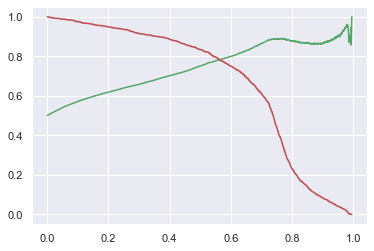

In [213]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Make predictions on Test Set..

In [185]:
scaler = StandardScaler()
test_columns = list(features_test.columns)

features_test[test_columns] = scaler.fit_transform(features_test[test_columns])

In [187]:
features_test = features_test[useful_columns]
features_test.head()

,max_rech_amt_6,loc_og_t2f_mou_6,roam_og_mou_8,max_rech_data_8,isd_ic_mou_8,std_ic_mou_8,total_rech_data_8,std_ic_t2m_mou_7,aug_vbc_3g,jul_vbc_3g,og_others_7,vol_2g_mb_7,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_7,monthly_2g_8,isd_og_mou_7,loc_ic_t2f_mou_8,og_others_8,aon,std_og_t2f_mou_8,loc_og_t2c_mou_8,spl_ic_mou_8
14483,5.477548,-0.418490,3.715158,-0.704963,-0.256801,5.624319,-0.608320,2.939712,-0.437021,-0.449714,-0.119037,-0.434729,1.510220,-0.401557,-0.407418,-0.382609,-0.102207,-0.369845,-0.051509,-0.998057,-0.239398,2.172241,-0.274307
8922,0.222838,0.042079,-0.283501,1.113022,-0.256801,-0.478296,-0.215650,-0.463994,-0.437021,-0.449714,-0.119037,-0.434729,-0.819435,-0.401557,1.911175,-0.382609,-0.102207,0.969145,-0.051509,2.584404,-0.239398,-0.351589,-0.274307
15014,-0.893787,-0.418490,-0.270418,-0.451054,-0.253529,-0.029248,1.747702,-0.442027,0.836268,1.045349,-0.119037,-0.178662,-0.586470,-0.238377,-0.407418,-0.382609,-0.102207,-0.372928,-0.051509,-0.755643,-0.239398,-0.351589,-0.274307
19846,-0.644189,-0.418490,-0.283501,-0.471367,-0.250911,5.986829,-0.215650,6.109647,-0.437021,-0.449714,-0.119037,-0.434729,-0.353504,-0.399686,-0.407418,-0.382609,-0.102207,-0.147536,-0.051509,-0.741942,-0.239398,-0.282944,-0.274307
27504,-0.368316,-0.418490,-0.283501,-0.704963,0.147034,-0.452156,-0.608320,-0.368860,-0.437021,-0.449714,-0.119037,-0.434729,-0.819435,-0.401557,-0.407418,-0.382609,-0.102207,-0.431160,-0.051509,-0.473178,-0.239398,-0.351589,0.807676


In [188]:
features_test_sm = sm.add_constant(features_test)

In [189]:
# make predictions...
labels_test_pred = res.predict(features_test_sm)

In [190]:
labels_test_pred[:10]

14483    0.858355
8922     0.241820
15014    0.360392
19846    0.420475
27504    0.743321
17053    0.517508
1032     0.507873
14634    0.089337
10314    0.857078
18995    0.451789
dtype: float64

In [191]:
# Converting y_test to dataframe
labels_test_df = pd.DataFrame(labels_test)

In [192]:
# Converting y_pred to a dataframe which is an array
labels_pred_1 = pd.DataFrame(labels_test_pred)
# Let's see the head
labels_pred_1.head()

,0
14483,0.858355
8922,0.241820
15014,0.360392
19846,0.420475
27504,0.743321


In [193]:
# Removing index for both dataframes to append them side by side 
labels_pred_1.reset_index(drop=True, inplace=True)
labels_test_df.reset_index(drop=True, inplace=True)

In [199]:
# Appending y_test_df and y_pred_1
labels_pred_final = pd.concat([labels_test_df, labels_pred_1],axis=1)

In [200]:
labels_pred_final.head()

,churned_customer,0
0,0,0.858355
1,0,0.241820
2,0,0.360392
3,0,0.420475
4,0,0.743321


In [201]:
# Renaming the column 
labels_pred_final= labels_pred_final.rename(columns={ 0: 'CHURNED_Prob'})
labels_pred_final.head()

,churned_customer,CHURNED_Prob
0,0,0.858355
1,0,0.241820
2,0,0.360392
3,0,0.420475
4,0,0.743321


In [202]:
# Rearranging the columns
labels_pred_final = labels_pred_final.reindex(['churned_customer','CHURNED_Prob'], axis=1)
labels_pred_final.head()

,churned_customer,CHURNED_Prob
0,0,0.858355
1,0,0.241820
2,0,0.360392
3,0,0.420475
4,0,0.743321


In [214]:
labels_pred_final['final_predicted'] = labels_pred_final.CHURNED_Prob.map(lambda x: 1 if x > 0.58 else 0)

In [215]:
# Let's check the overall accuracy.
print("Accuracy Score : ")
accuracy_score(labels_pred_final.churned_customer, labels_pred_final.final_predicted)

Accuracy Score : 


0.6461161807255731

In [216]:
# create confusion matrix again
confusion2 = confusion_matrix(labels_pred_final.churned_customer, labels_pred_final.final_predicted )
confusion2

array([[5200, 3105],
       [  75,  606]], dtype=int64)

In [217]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
print("Sensitivity Score : ")
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

Sensitivity Score : 


0.8898678414096917

In [219]:
print("Specificity Score : ")
# Calculate Specificity

TN/(TN+FP)

Specificity Score : 


0.6261288380493678

### Observation: 

Here the score of sensitivity is very high for both train and test data with sensitivity of test data being more than train data. Hence we can create this model as our baseline model in the category of Interpretable model.

### Building Good Fit Model.

Here we will perform PCA for dimensionality reduction process. Also we will use different combination of models with hyperparameter tuning and PCA.

### Splitting the data...

In [220]:
# set the features and labels...
features = telecom_churn_data_hvc[telecom_churn_data_hvc.columns[~telecom_churn_data_hvc.columns.isin(['churned_customer'])]]
labels = telecom_churn_data_hvc['churned_customer']

In [221]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling.

In [222]:
scaler = StandardScaler()
train_columns = list(features_train.columns)

features_train[train_columns] = scaler.fit_transform(features_train[train_columns])

In [223]:
features_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amount_data_6,total_amount_data_7,AVG_Amount_Calling_Data_6_7
5067,0.060025,0.893212,0.415240,-0.100301,-0.146900,-0.201657,0.475473,0.886643,2.154956,5.061038,7.007114,-0.257696,4.787386,6.743062,-0.275981,-0.456458,-0.398243,0.007253,-0.463320,-0.682425,0.175674,2.620932,-0.313401,0.048457,-0.345327,-0.129005,1.564094,-0.416739,-0.663125,0.097058,-0.032704,-0.341063,-0.205607,-0.151263,-0.149123,2.463152,0.031087,-0.244171,7.161604,-0.133060,-0.329503,1.459072,-0.160013,-0.099732,0.958254,-0.475865,-0.426534,0.211086,0.217349,-0.116705,-0.048293,-0.333584,-0.622638,1.302668,-0.603129,-0.600594,-0.596692,-0.136837,-0.652999,-0.374312,0.025649,-0.446922,0.993348,-0.331892,-0.738764,-0.383059,-0.253990,-0.163966,1.616091,0.282517,-0.117581,3.621103,-0.283233,-0.286484,0.311007,0.035573,-0.192326,2.926719,-0.310280,-0.650919,0.703443,-0.438516,-0.233037,0.909045,-0.257556,0.333341,2.661453,-0.257943,-0.257386,-0.259316,-0.673470,-0.295149,-0.096778,0.098997,0.856607,0.679863,-0.256991,-0.262803,-0.090174,0.278832,0.282540,0.390383,-0.644085,-0.657614,-0.612553,-0.759253,-0.768907,-0.709334,-0.754446,-0.761873,-0.689211,-0.440771,-0.433536,-0.400786,-0.480919,-0.492414,-0.475711,-0.407885,-0.413361,-0.384855,-0.447217,-0.471072,-0.441475,-0.38639,-0.388215,-0.371974,-0.288636,-0.275031,-0.262782,-0.745860,-0.457293,-0.452006,-0.434515,-0.389138,-0.101767,-0.278609
25362,0.609152,-1.117662,-1.225378,0.296513,-0.474843,-0.566410,0.942186,-0.517087,-0.793058,-0.278399,-0.198500,-0.074800,-0.289577,-0.250966,-0.164327,-0.129185,-0.497578,-0.520309,-0.426830,-0.735777,-0.748550,-0.149856,-0.419901,-0.416891,-0.345327,-0.306659,-0.348801,-0.362197,-0.749004,-0.761169,0.447226,-0.294323,-0.424422,1.475054,-0.167200,-0.455512,1.162136,-0.244171,-0.243459,1.214901,-0.312064,-0.555966,-0.160013,-0.099732,-0.152751,0.402462,3.151675,-0.509265,2.068260,-0.116705,-0.048293,0.885471,-0.579848,-0.849772,1.699163,1.301878,-0.596692,-0.543662,-0.605235,-0.810580,-0.361168,-0.425355,-0.456226,0.184881,-0.000694,-0.838070,0.607879,-0.011098

In [224]:
print("Training dataset size",features_train.shape)
print("Training dataset target size",labels_train.shape)
print("Test dataset size",features_test.shape)
print("Test dataset target size",labels_test.shape)

Training dataset size (20967, 136)
Training dataset target size (20967,)
Test dataset size (8986, 136)
Test dataset target size (8986,)


### Performing PCA

In [225]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [226]:
#Doing the PCA on the train data
pca.fit(features_train)

PCA(random_state=42, svd_solver='randomized')

In [227]:
pca.components_

array([[ 0.15230635,  0.16424818,  0.15739405, ...,  0.00467479,
         0.00142505,  0.00243109],
       [-0.00387014, -0.00875061,  0.01522996, ...,  0.07827924,
         0.07891014,  0.09184927],
       [ 0.11775916,  0.15143534,  0.14469462, ...,  0.15508442,
         0.17567874,  0.19415389],
       ...,
       [-0.00554241, -0.01039911,  0.00525424, ..., -0.00754962,
        -0.00985875,  0.01429411],
       [ 0.00916686, -0.01288998,  0.0033166 , ...,  0.00098144,
         0.0021976 , -0.00634439],
       [-0.00118949, -0.00131103,  0.00216769, ...,  0.0046509 ,
         0.01325582, -0.01293592]])

In [228]:
pca.explained_variance_ratio_

array([1.24297744e-01, 1.00949820e-01, 6.72347427e-02, 5.14246164e-02,
       4.42173388e-02, 3.31521152e-02, 2.85604784e-02, 2.65077224e-02,
       2.50533843e-02, 2.36458052e-02, 2.13076330e-02, 2.09146363e-02,
       1.99592715e-02, 1.75284108e-02, 1.61805751e-02, 1.54995960e-02,
       1.43800465e-02, 1.39697593e-02, 1.33304263e-02, 1.18881103e-02,
       1.12565678e-02, 1.07320998e-02, 1.04308984e-02, 9.87504256e-03,
       9.62820942e-03, 8.70501060e-03, 8.44955794e-03, 7.99654970e-03,
       7.95118248e-03, 7.81966089e-03, 7.45287367e-03, 7.03872676e-03,
       6.58351564e-03, 6.50038623e-03, 6.36143012e-03, 6.25226669e-03,
       6.03563193e-03, 5.80486179e-03, 5.74715990e-03, 5.65651789e-03,
       5.27134744e-03, 5.10745792e-03, 4.86867333e-03, 4.84715368e-03,
       4.78490627e-03, 4.52189506e-03, 4.30982204e-03, 4.17294497e-03,
       4.14091367e-03, 4.04155128e-03, 3.97545851e-03, 3.87086683e-03,
       3.70264009e-03, 3.54849270e-03, 3.45404629e-03, 3.27885189e-03,
      

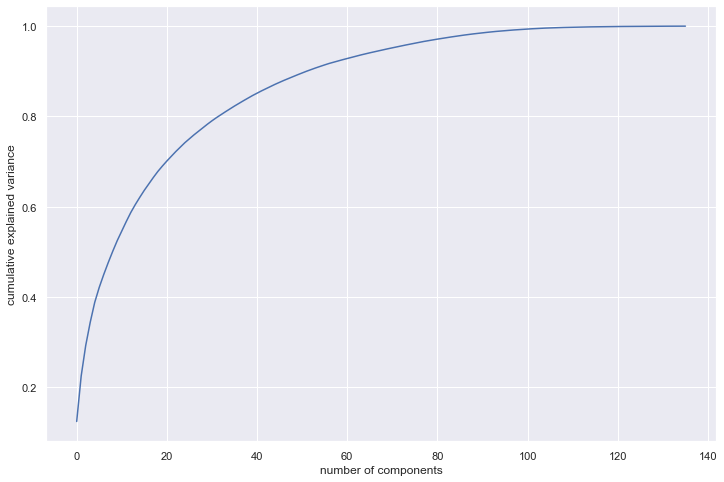

In [229]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [230]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [12.4 10.1  6.7  5.1  4.4  3.3  2.9  2.7  2.5  2.4  2.1  2.1  2.   1.8
  1.6  1.5  1.4  1.4  1.3  1.2  1.1  1.1  1.   1.   1.   0.9  0.8  0.8
  0.8  0.8  0.7  0.7  0.7  0.7  0.6  0.6  0.6  0.6  0.6  0.6  0.5  0.5
  0.5  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [231]:
print(pca.explained_variance_ratio_.cumsum())

[0.12429774 0.22524756 0.29248231 0.34390692 0.38812426 0.42127638
 0.44983686 0.47634458 0.50139796 0.52504377 0.5463514  0.56726604
 0.58722531 0.60475372 0.62093429 0.63643389 0.65081394 0.6647837
 0.67811412 0.69000223 0.7012588  0.7119909  0.7224218  0.73229684
 0.74192505 0.75063006 0.75907962 0.76707617 0.77502735 0.78284701
 0.79029989 0.79733861 0.80392213 0.81042252 0.81678395 0.82303621
 0.82907184 0.83487671 0.84062387 0.84628038 0.85155173 0.85665919
 0.86152786 0.86637502 0.87115992 0.87568182 0.87999164 0.88416458
 0.8883055  0.89234705 0.89632251 0.90019337 0.90389601 0.90744451
 0.91089855 0.91417741 0.91738318 0.92021616 0.92300812 0.92569838
 0.9283646  0.93098623 0.93357645 0.93613072 0.93859005 0.94089432
 0.94318722 0.94544322 0.94765161 0.94983319 0.95198584 0.95411942
 0.9561837  0.95824455 0.96026322 0.96221642 0.96416742 0.96609069
 0.96785929 0.96956154 0.97122851 0.97285724 0.9744421  0.97596415
 0.97745961 0.9789047  0.98030717 0.98168336 0.98286767 0.98404

In [232]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)

In [233]:
train_pca = pca_final.fit_transform(features_train)
train_pca.shape

(20967, 54)

In [234]:
#Applying selected components to the test data
test_pca = pca_final.transform(features_test)
test_pca.shape

(8986, 54)

### Building a Logistics Regression Model with PCA

Here we have selected 54 components of PCA which ensure around 85% variance.

In [235]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression

logistic_pca = LogisticRegression()
model_pca = logistic_pca.fit(train_pca,labels_train)

In [236]:
#Making prediction on the test data
predict_probability_test = model_pca.predict_proba(test_pca)[:,1]

In [240]:
predict_probability_test

array([1.00000000e+000, 0.00000000e+000, 1.00000000e+000, ...,
       0.00000000e+000, 0.00000000e+000, 9.70989551e-210])

In [247]:
print("ROC AUC Score is : {:2.2}".format(roc_auc_score(labels_test, predict_probability_test)))

ROC AUC Score is : 0.81


### Observation:

With 54 components we have achieved the ROC AUC score of 81%.

Trying with 45 components.

In [248]:
pca_final_1 = IncrementalPCA(n_components=45)

In [249]:
train_pca = pca_final_1.fit_transform(features_train)
train_pca.shape

(20967, 45)

In [250]:
#Applying selected components to the test data
test_pca = pca_final_1.transform(features_test)
test_pca.shape

(8986, 45)

In [251]:
logistic_pca_1 = LogisticRegression()
model_pca_1 = logistic_pca_1.fit(train_pca,labels_train)

In [252]:
#Making prediction on the test data
predict_probability_test = model_pca_1.predict_proba(test_pca)[:,1]

print("ROC AUC Score is : {:2.2}".format(roc_auc_score(labels_test, predict_probability_test)))

In [260]:
pca_final_2 = PCA(n_components=70)
train_pca = pca_final_2.fit_transform(features_train)
test_pca = pca_final_2.transform(features_test)
test_pca.shape

(8986, 70)

In [261]:
#training the regression model
logistic_pca_2 = LogisticRegression()
model_pca_2 = logistic_pca_2.fit(train_pca,labels_train)
#Making prediction on the test data
predict_probability_test = model_pca_2.predict_proba(test_pca)[:,1]

In [263]:
print("ROC AUC Score is : {:2.2}".format(roc_auc_score(labels_test, predict_probability_test)))

ROC AUC Score is : 0.83


### Observation:

Here after selecting 70 components, we are able to get the ROC curve upto 83%.

### Building a Random Forest Classifier.

GridSearch and Cross Validation to perform Hyperparameter tuning.

In [268]:
forest = RandomForestClassifier(n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_rf = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [269]:
# fit the model...
model_rf.fit(features_train, labels_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [270]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9293704244888215
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


predict on the test data..

In [282]:
# predict churn on test data
labels_pred = model_rf.predict(features_test)

# create onfusion matrix
cm = confusion_matrix(labels_test, labels_pred)
print(cm)

# check area under curve
labels_pred_prob = model_rf.predict_proba(features_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(labels_test, labels_pred_prob),2))

[[8305    0]
 [ 681    0]]
AUC:    	 0.61


In [285]:
max_features = int(round(np.sqrt(features_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [286]:
# fit model
rf_model.fit(features_train, labels_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.5s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [287]:
# OOB score
rf_model.oob_score_

0.9459627032956551

In [288]:
labels_pred = rf_model.predict(features_test)

# create onfusion matrix
cm = confusion_matrix(labels_test, labels_pred)
print(cm)

[[8305    0]
 [ 681    0]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [289]:
# check area under curve
labels_pred_prob = rf_model.predict_proba(features_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(labels_test, labels_pred_prob),2))

ROC:    	 0.59


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### Feature Importance through Random Forest Classifier.

In [292]:
total_features = list(features.columns)

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': total_features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999999


,variables,importance_percentage
0,roam_og_mou_8,7.498259
1,total_ic_mou_8,6.641105
2,total_rech_amt_8,4.566672
3,roam_ic_mou_8,4.358287
4,total_og_mou_8,4.261450
5,arpu_8,4.031920
6,last_day_rch_amt_8,3.610463
7,loc_ic_t2t_mou_8,2.243925
8,loc_ic_mou_8,2.163711
9,av_rech_amt_data_8,1.892505


In [295]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

In [296]:
print(top_features)

0          roam_og_mou_8
1         total_ic_mou_8
2       total_rech_amt_8
3          roam_ic_mou_8
4         total_og_mou_8
5                 arpu_8
6     last_day_rch_amt_8
7       loc_ic_t2t_mou_8
8           loc_ic_mou_8
9     av_rech_amt_data_8
10        max_rech_amt_8
11      loc_ic_t2m_mou_8
12      loc_og_t2m_mou_8
13       max_rech_data_8
14          loc_og_mou_8
15     total_rech_data_8
16      total_rech_num_8
17           vol_2g_mb_8
18          offnet_mou_8
19          spl_ic_mou_8
20         roam_og_mou_7
21           onnet_mou_8
22      loc_ic_t2f_mou_8
23           og_others_8
24                arpu_7
25                   aon
26           vol_3g_mb_8
27        total_ic_mou_7
28      loc_og_t2t_mou_8
29      loc_ic_t2t_mou_7
Name: variables, dtype: object


In [311]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(train_pca, labels_train)

SVC()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8305
           1       0.00      0.00      0.00       681

    accuracy                           0.92      8986
   macro avg       0.46      0.50      0.48      8986
weighted avg       0.85      0.92      0.89      8986

Accuracy for the test dataset 92.4%
ROC for the test dataset 50.0%


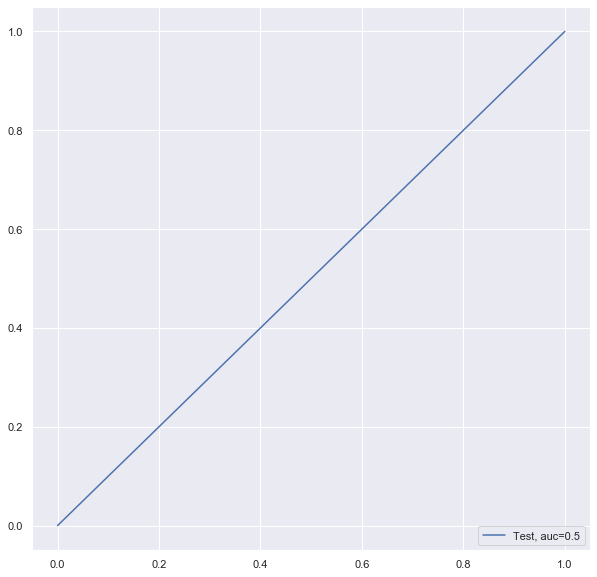

In [313]:
from sklearn.metrics import auc
prediction_svm = svm_rbf.predict(test_pca)

print(classification_report(labels_test, prediction_svm))
accuracy = accuracy_score(labels_test, prediction_svm)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(labels_test, prediction_svm)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Business Insights:

From the above top 30 features obtained as well as features obtained from Logistic Regression Model, we can infer the following points.

1. Incoming and Outgoing calls are necessary indicators for customer getting churned.
2. Roaming charges also affect customers to a good extent thereby making them churned.
3. Data consumption or data recharges has reduced in the 8th month as compared to that in 6th and 7th month.
4. The telecom company must provide attractive offers to customers when it comes to STD, ISD or local calls.